# PROJECT: DEEP REINFORCEMENT LEARNING
**AUTHOR**: Aeneas Wei-Chi Hsu

Here are some philosphophical notes:

1. Always understand what you code. You can resort to ChatGPT or Gemini to quick-fix and problem shut-down, but it is still needed to know the underlying mechanisms of your code.

2. It is 100% reasonable to ask ChatGPT or Gemini to help but you still need to focus on the architecture of your whole model and all blocks. Suppose you have several ideas and you want to test them as soon as possible to see whether some of them work or just backfire you. In this scenario, using ChatGPT and Gemini is 100% reasonable and understandable. But, what if your ideas work well or make thing worse, how do you figure out what's going wrong? So, you still need think and pay attention to test your thoughts throughfully.

3. Always feel free to test and do additional work. You should not make your code as a big black box for yourself. You must change your mindset from **TASK-ACHIEVING** to **MAXIMIZE IMPLEMENTED PRACTICE**. I mean, suppose you are brilliantly achieve your **GOAL**, say $\text{Avg. Score}= 950^+ $, but you still know nothing why your code can do that. It is meaningless. On the other hand, suppose your agent just performs as average 600+ but you have **lots of insights** of each part in your program. That is a nice work. Plus, if you can clearly explain what's going on and the overall contribution of each part, you will get more from this approach.

4. The SOTA. There is no guarantee that you get invitations from DeepMind or openAI just because your agent is a SOTA. However, it is highly possible for you to get a decent job position that you provide a novel, creative, innovative approach to reach a reasonable goal under specific conditions (say, limited computational resources), which makes you an interesting and showing you as an intelligent individual.

5. Do more work to verify your ideas when you know you are doing something interesting. I have to emphasize this point: something important doesn't mean something interesting. However, well, we always like to see what sentences are after the **HOWEVER**, you must think and IMPLEMENT something necessary to be done and make the thing interesting and important (even essential). Please though out the mindset that influences you to pay attention to what you CAN do. Think something big than what you can do and do it. This makes be a amazing guy (at least you will not be a boring one).

> LEARNING and FIX.


 **Coding EVERYDAY but you need to SLEEP. Perhaps Shannon will tell you something when you are dreaming.**


# Introduction: Double Duel DQN on Car Racing v3

Goal: Average Reward 600+ (more is good) in `randomized = True` (real test)

Environment: CarRacing-v3 with domain_randomize=True

I adopt a hybrid approach, for more detail, check this one: https://arxiv.org/pdf/1710.02298。

The logic is following: it must work first then we go further.

先求不傷身體再求有療效。

⬆️ DQN (Basic)

⬆️ Dual Head (Q-head: Advanced, Value head -- prevent from overestimate Q-value)

⬆️ Double Network (Model Net + Target Net)

⬆️ Multiple Step Memory (SARSA)

⬆️ Prioritization (Learning from useful experience)

⬆️ Epsilon modification (Adaptive exploration)

⬆️ Reward shaping (Incentive)

⬆️ Residual Connection (Feature engineering)

⬆️ Contrast Enhancement (Inspired by eye)

⬆️ Ensemble (Triple Advantage/Value Network)

⬆️ Training on Randomized Environment (For Generalization)

🧪 Vision Enhancement  (Visual Cortex)

🧪 Evolution

🧪 Attention (Because I dreamt Shannon and YouTube Algorithm told me sth.)

---
I tested the following listed elements, but it does not works well. Perhaps it is due to un-fine-tuned parameters. However, at this stage, for some reasons, I decided not to use them. In future, it is possible to add them back.

⬇️ Q-Distribution (not used) -- I want to remain the duelling structure first.

⬇️ Noisy Net (Unstable)

⬇️ Attention Mechanism (backfire)

> I decide to train an agent to drive because I don't know how to drive.

IBM on Coursera  [Deep Learning with Keras and TensorFlow](https://www.coursera.org/learn/building-deep-learning-models-with-tensorflow/home)

Section [Building a Deep Q-Network with Keras](https://www.coursera.org/learn/building-deep-learning-models-with-tensorflow/ungradedLti/AlszB/lab-building-a-deep-q-network-with-keras)

University of Alberta on Coursera [Fundamentals of Reinforcement Learning](https://www.coursera.org/learn/fundamentals-of-reinforcement-learning/home)


# Goal: Deep Q-Network with Keras

The story started when I took a course called Control Theory — though in practice, it was all about reinforcement learning. At the time, I didn’t understand much. I just wanted to finish the final project: solving the CarRacing environment (v2).

While looking for help, I found a public DualDQN implementation on GitHub. It looked cool, so I tweaked it a little and used it for my project. Technically, it wasn’t my agent that solved the problem — it was someone else’s PyTorch code that did most of the heavy lifting.

But for some reason, I’ve never liked PyTorch. So now, I’m rebuilding the entire thing from scratch — in TensorFlow and Keras, the way I think it should be.

故事是這樣的，我之前上過一門課，叫做《控制理論》，但是內容都是在講 Reinforcement Learning。
不過那個時候我什麼都不懂，只是想要做完期末專題：CarRacing。
所以我在Github上面看到有人 share 了一段 DualDQN 的code，我覺得很棒，我就拿來改。
最後那個不是我的 Agent 幫我完成了我的 Final Project。
不過那段 Code 是用 pytorch 寫的。但是基於某些理由我不喜歡 pytorch。
現在我要做這個 Project。

# Box2D

https://gymnasium.farama.org/environments/box2d/

In [1]:
# Instal Gym
! pip install gymnasium
! pip install swig
! pip install gymnasium[box2d]
# Install OpenCV
! pip install opencv-python

# ==== Note ====
# If you are run it in local jupyter lab, uncomment this line
#!pip install box2d pygame

zsh:1: no matches found: gymnasium[box2d]


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from collections import deque
from tensorflow.keras.models import Model

# ==== Layers ====
from tensorflow.keras.layers import Input, InputLayer, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose, LeakyReLU, Dropout, BatchNormalization, ReLU, MaxPooling2D, UpSampling2D, Concatenate, Activation, Lambda, Add, LayerNormalization, LeakyReLU, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, ZeroPadding2D, Cropping2D, ZeroPadding1D, Cropping1D, Layer, Average, AveragePooling1D, GlobalAveragePooling1D, GRU

from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization

# ==== Optimizer ====
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl

# ==== Callbacks ====
from tensorflow.keras.callbacks import EarlyStopping

# ==== Saving ====
from keras.saving import register_keras_serializable

# ==== Get File ====
from tensorflow.keras.utils import get_file

# ==== tqdm ====
from tqdm import tqdm
from tqdm import trange

# ==== Counter ====
from collections import Counter

# ==== Statistics ====
import scipy.stats

# ==== Video ====
import imageio
import os
import cv2 # Import cv2 here

# Environment

https://gymnasium.farama.org/environments/box2d/car_racing/

Actions = [do nothing, left, right, gas, brake]

Observation = **A top-down 96x96 RGB image of the car and race track.**


In [3]:
env = gym.make("CarRacing-v3",
               render_mode= None,
               lap_complete_percent=0.95,
               domain_randomize=True,
               continuous=False)

env.close()

# Model


⬇️ The basic architecute is Duel DQN. Therefore, for each Q-head, we will have two subnet: advanced and value.

Furthermore, I use Stack Frame (RGB). Then the CNN input is 96 x 96 x 12 (for 4 frames)

I use Residual Connect and Constrast Enhancement. I suppose it helps. This idea is inspired by bio-visual system. How you see this world will determine your brain structure.

---
⬇️ My feeling

📦 It is like a box. You never know what you will find inside the box.

📈 OR it is just like a stack.

---

Well, PLEASE NOTE THIS:

**DO NOT USE `Lamda()` FOR YOUR OWN GOOD.**

## Contrast Enhancement

In [4]:
# ==== Nonlinear Contrast Enhancement ====

# ==== Register your layer ====
@register_keras_serializable()

class ContrastEnhance(Layer):
    def __init__(self, alpha=1.5, **kwargs):
        super(ContrastEnhance, self).__init__(**kwargs)
        self.alpha = alpha

    def call(self, x):
        mean = tf.reduce_mean(x, axis=[1, 2], keepdims=True)
        return tf.clip_by_value(self.alpha * (x - mean) + mean, 0.0, 1.0)

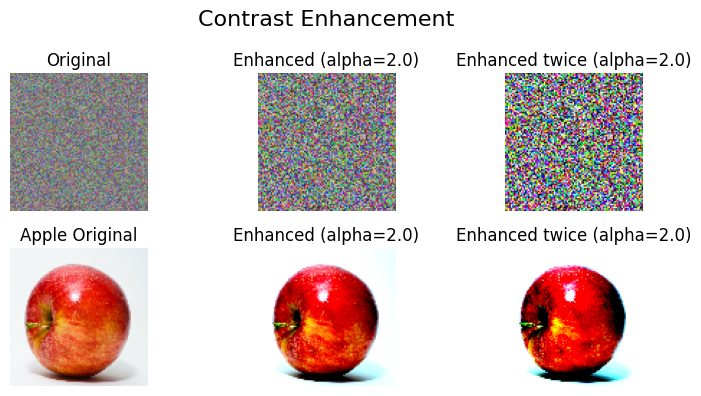

In [5]:
# ==== Visualization of Contrast Enhancement ====
# (batch_size, height, width, channels)
img = tf.random.uniform((1, 96, 96, 3), minval=0.3, maxval=0.7)  # soft grayish noise

# use apple image from Wikipedia
apple_path = tf.keras.utils.get_file("apple.jpg", "https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg")
apple_img = tf.image.decode_jpeg(tf.io.read_file(apple_path), channels=3)
apple_img = tf.image.resize(apple_img, [96, 96])
# Set apple image from  range 0-to-255.0 to range 0-to-1
apple_img = apple_img / 255.0

#apple_img = tf.image.rgb_to_grayscale(apple_img)
apple_img = tf.expand_dims(apple_img, axis=0)  # shape = (1, 96, 96, 1)

# Apply Contrast Enhance
# Define Layer
layer = ContrastEnhance(alpha=2.0)

# For random image
enhanced_img = layer(img)
enhanced_twice_image = layer(enhanced_img)

# For apple image
enhanced_apple_image = layer(apple_img)
enhanced_twice_apple_image = layer(enhanced_apple_image)

# ==== Plot Original vs Enhanced ====
plt.figure(figsize=(8, 4))

# Plot image
plt.subplot(2, 3, 1)
plt.title("Original")
plt.imshow(img[0].numpy())
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Enhanced (alpha=2.0)")
plt.imshow(enhanced_img[0].numpy())
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Enhanced twice (alpha=2.0)")
plt.imshow(enhanced_twice_image[0].numpy())
plt.axis('off')

# Plot apple image
plt.subplot(2, 3, 4)
plt.title("Apple Original")
plt.imshow(apple_img[0].numpy())
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Enhanced (alpha=2.0)")
plt.imshow(enhanced_apple_image[0].numpy())
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Enhanced twice (alpha=2.0)")
plt.imshow(enhanced_twice_apple_image[0].numpy())
plt.axis('off')

plt.suptitle("Contrast Enhancement", fontsize=16)
plt.tight_layout()
plt.show()

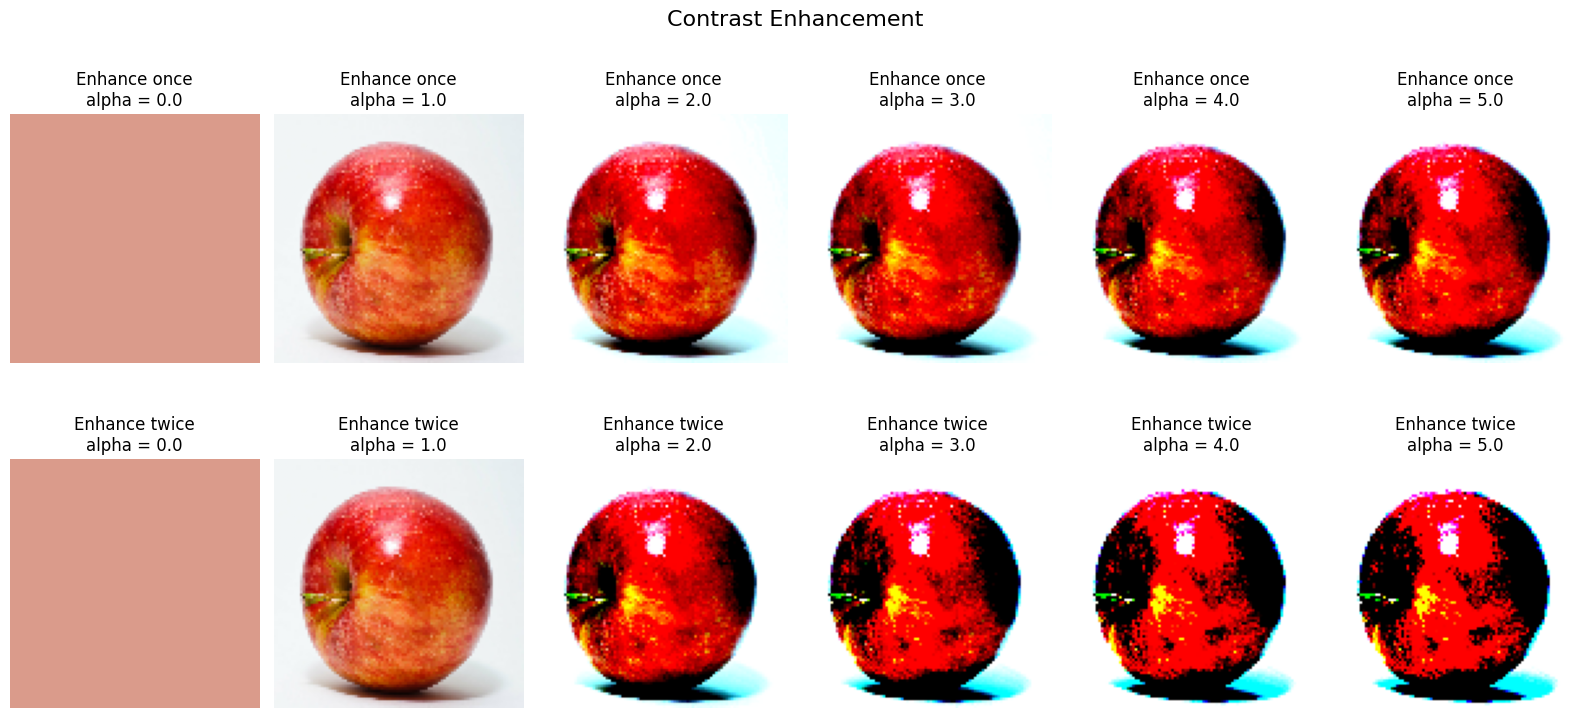

In [6]:
# ==== Test and Visualization ====
# Let's check if we vary the alpha rate from 0 to 5 of our images
alphas = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

# We test on apple image only

# Create arrays to store processed apple images
enhance_once = []
enhance_twice = []

for alpha in alphas:
  # Apply alpha
  # Enhance once
  layer = ContrastEnhance(alpha=alpha)
  enhanced_apple_image = layer(apple_img)
  enhance_once.append(enhanced_apple_image)

  # Ehance twice

  enhanced_twice_apple_image = layer(enhanced_apple_image)
  enhance_twice.append(enhanced_twice_apple_image)


# ==== Plot ====
plt.figure(figsize=(16, 8))


# use for loop to build a subplot for enhance_once and enhance_twice images
for i, (once, twice) in enumerate(zip(enhance_once, enhance_twice)):

  plt.subplot(2, len(alphas), i + 1)
  plt.title(f"Enhance once\nalpha = {alphas[i]}")
  plt.imshow(once[0].numpy())
  plt.axis('off')

  plt.subplot(2, len(alphas), len(alphas) + i + 1)
  plt.title(f"Enhance twice\nalpha = {alphas[i]}")
  plt.imshow(twice[0].numpy())
  plt.axis('off')

# suptitle
plt.suptitle("Contrast Enhancement", fontsize=16)
plt.tight_layout()
plt.show()


## Sobel Layer

In [7]:
# ==== Sober ====

# ==== Register your layer ====
@register_keras_serializable()

class SobelEdgeLayer(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # Sobel kernels (3x3)
        self.sobel_x = tf.constant([[[-1, 0, 1],
                                     [-2, 0, 2],
                                     [-1, 0, 1]]], dtype=tf.float32)
        self.sobel_y = tf.constant([[[-1, -2, -1],
                                     [ 0,  0,  0],
                                     [ 1,  2,  1]]], dtype=tf.float32)
        self.sobel_45 = tf.constant([[[-2, -1, 0],
                              [-1,  0, 1],
                              [ 0,  1, 2]]], dtype=tf.float32)

        self.sobel_135 = tf.constant([[[ 0, -1, -2],
                               [ 1,  0, -1],
                               [ 2,  1,  0]]], dtype=tf.float32)

    def call(self, x):
        # Input shape: (batch, H, W, C)
        channels = x.shape[-1]
        kernel_x = tf.expand_dims(self.sobel_x, axis=-1)
        kernel_y = tf.expand_dims(self.sobel_y, axis=-1)

        # Repeat for depthwise convolution
        kernel_x = tf.repeat(kernel_x, repeats=channels, axis=-1)
        kernel_y = tf.repeat(kernel_y, repeats=channels, axis=-1)

        kernel_x = tf.reshape(kernel_x, [3, 3, channels, 1])
        kernel_y = tf.reshape(kernel_y, [3, 3, channels, 1])

        # Apply Sobel filters
        gx = tf.nn.depthwise_conv2d(x, kernel_x, strides=[1, 1, 1, 1], padding="SAME")
        gy = tf.nn.depthwise_conv2d(x, kernel_y, strides=[1, 1, 1, 1], padding="SAME")

        grad_magnitude = tf.sqrt(tf.square(gx) + tf.square(gy) + 1e-6)  # prevent sqrt(0)

        # Test
        #x = 0.2*(1-grad_magnitude)

        return grad_magnitude

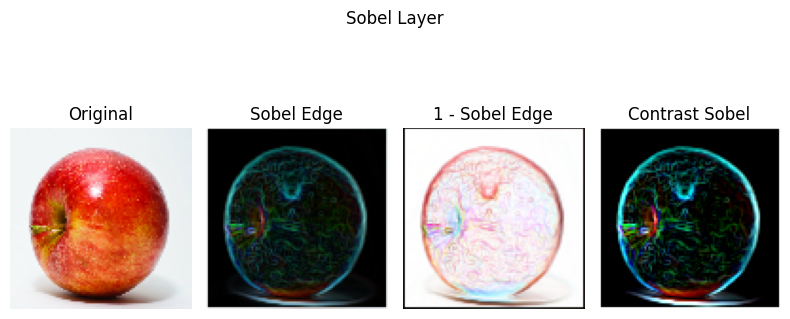

In [8]:
# ==== Visualization ====

# Use apple image as our example
layer = SobelEdgeLayer()
# Apply layer
sobel_apple_image = layer(apple_img)
# normalize sobel_apple_image to range [0, 1]
sobel_apple_image = (sobel_apple_image - tf.reduce_min(sobel_apple_image)) / (tf.reduce_max(sobel_apple_image) - tf.reduce_min(sobel_apple_image))
contrast_sobel_apple_image = ContrastEnhance(alpha=2.0)(sobel_apple_image)

# ==== Plot ====
plt.figure(figsize=(8, 4))

# Plot the original apple image
plt.subplot(1, 4, 1)
plt.imshow(apple_img[0].numpy())
plt.axis('off')
plt.title("Original")

# Plot apple image
plt.subplot(1, 4, 2)
plt.imshow(sobel_apple_image[0].numpy())
plt.axis('off')
plt.title("Sobel Edge")
# Plot 1 - sobel_apple_image
plt.subplot(1, 4, 3)
plt.imshow(1 - sobel_apple_image[0].numpy())
plt.axis('off')
plt.title("1 - Sobel Edge")

# Plot Contrast Sobel Image
plt.subplot(1, 4, 4)
plt.imshow(contrast_sobel_apple_image[0].numpy())
plt.axis('off')
plt.title("Contrast Sobel")

plt.suptitle('Sobel Layer')
plt.tight_layout()
plt.show()


## Gabor Layer

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.initializers import Constant
import numpy as np

def create_gabor_filter_bank(num_filters, ksize):
    filters = []
    for i in range(num_filters):
        theta = i * np.pi / num_filters  # orientation
        sigma = 2.0
        Lambda = 5.0
        psi = 0
        gamma = 0.5

        # Gabor kernel formula
        xmax = ksize // 2
        ymax = ksize // 2
        xmin = -xmax
        ymin = -ymax
        (y, x) = np.meshgrid(np.linspace(ymin, ymax, ksize), np.linspace(xmin, xmax, ksize))
        x_theta = x * np.cos(theta) + y * np.sin(theta)
        y_theta = -x * np.sin(theta) + y * np.cos(theta)
        gb = np.exp(-0.5 * (x_theta**2 + gamma**2 * y_theta**2) / sigma**2) * np.cos(2 * np.pi * x_theta / Lambda + psi)

        filters.append(gb)

    filters = np.array(filters)  # (num_filters, ksize, ksize)
    filters = filters[:, :, :, np.newaxis]  # (num_filters, ksize, ksize, 1)
    filters = np.transpose(filters, (1, 2, 3, 0))  # (ksize, ksize, 1, num_filters)
    return filters.astype(np.float32)

# ==== Register your layer ====
@register_keras_serializable()
class GaborConv2D(Layer):
    def __init__(self, filters=8, ksize=11, **kwargs):
        super().__init__(**kwargs)
        self.filters = filters
        self.ksize = ksize

    def build(self, input_shape):
        in_channels = input_shape[-1]
        gabor = create_gabor_filter_bank(self.filters, self.ksize)  # shape (ksize, ksize, 1, filters)
        gabor = np.tile(gabor, (1, 1, in_channels, 1))  # (ksize, ksize, in_channels, filters)
        self.gabor_kernel = self.add_weight(
            shape=gabor.shape,
            initializer=Constant(gabor),
            trainable=False,
            name='gabor_filter'
        )

    def call(self, inputs):
        return tf.nn.conv2d(inputs, self.gabor_kernel, strides=1, padding='SAME')

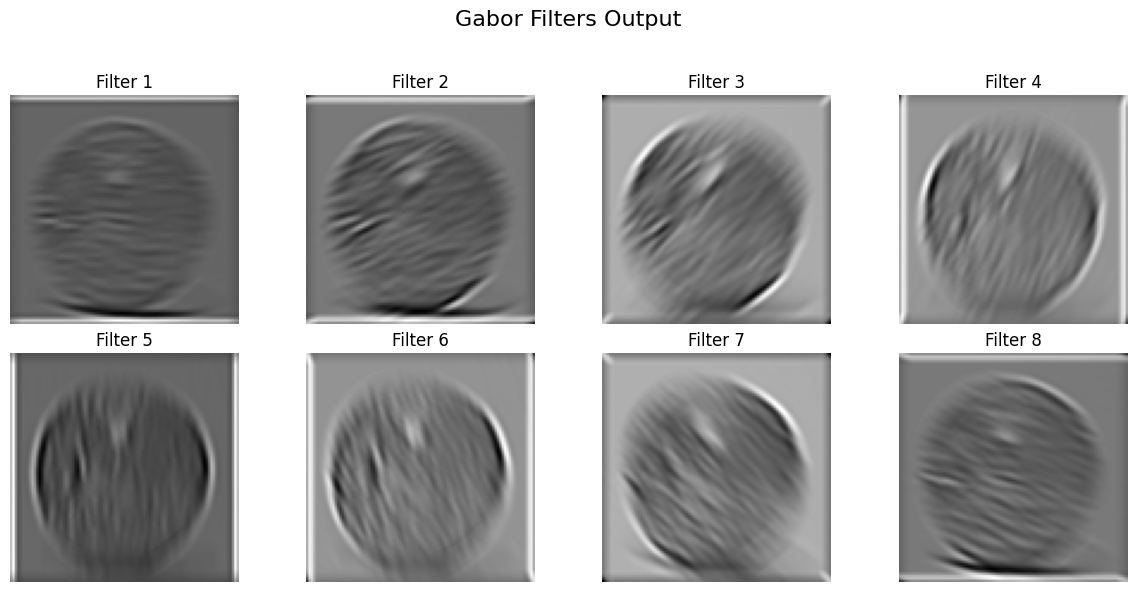

In [10]:
# ==== Visualization ====
# Use apple image as an example

# Apply layer
layer = GaborConv2D(filters=8, ksize=11)
gabor_apple_image = layer(apple_img)

# Plot

# gabor_apple_image shape is (1, 96, 96, 8)
output = gabor_apple_image[0]  # shape: (96, 96, 8)

# Plot Each Channel
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(output[..., i].numpy(), cmap='gray')  # Single
    plt.axis('off')
    plt.title(f"Filter {i+1}")
plt.suptitle("Gabor Filters Output", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Visual Enhance Block

In [11]:
@register_keras_serializable()
class VisualEnhanceBlock(Layer):
    def __init__(self, gene_code=None, **kwargs):
        super().__init__(**kwargs)

        # ==== Defaul Gene ====
        if gene_code is None:
            gene_code = [2, 0, 2.0, False]  # [contrast_times, sobel_times, alpha, use_residual]

        # ==== unpack ====
        self.contrast_times = int(gene_code[0])
        self.sobel_times = int(gene_code[1])
        self.alpha = float(gene_code[2])
        self.use_residual = bool(gene_code[3])

        # ==== layer list ====
        self.contrast_layers = [ContrastEnhance(alpha=self.alpha) for _ in range(self.contrast_times)]
        self.sobel_layers = [SobelEdgeLayer() for _ in range(self.sobel_times)]

    def call(self, inputs):
        x = inputs
        for contrast in self.contrast_layers:
            x = contrast(x)

        for sobel in self.sobel_layers:
            x = sobel(x) + x  # Enhance edge

        if self.use_residual:
            return Add()([x, inputs])
        else:
            return x

    def get_config(self):
        config = super().get_config()
        config.update({
            "gene_code": [self.contrast_times, self.sobel_times, self.alpha, self.use_residual]
        })
        return config

## Visualization of Visual Cortex (Image Preprocessing)

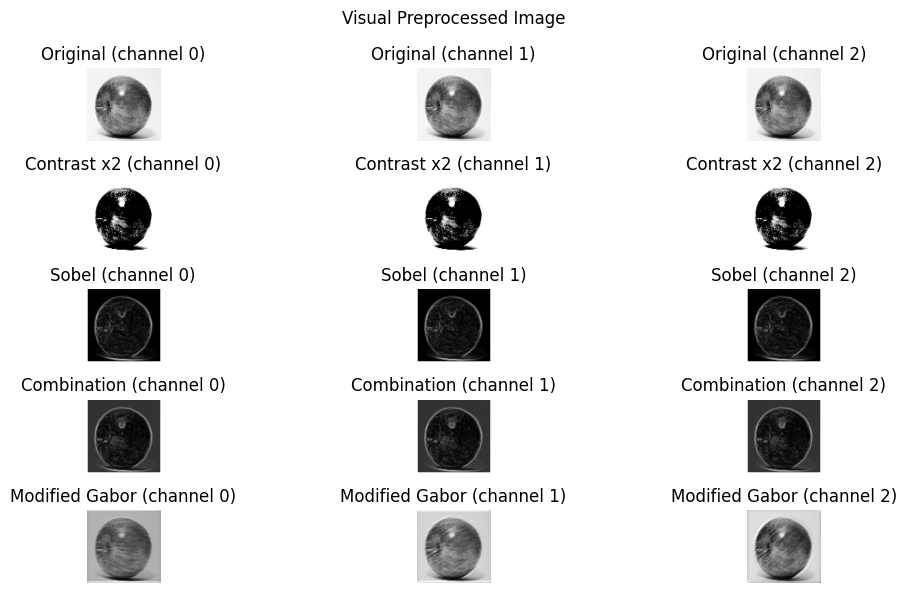

In [12]:
# ==== Visualization of Visual Enhancement ====

# ==== Apple Image ====
apple_path = tf.keras.utils.get_file("apple.jpg", "https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg")

# To Gray + resize
image = tf.image.decode_jpeg(tf.io.read_file(apple_path), channels=3)
image = tf.image.rgb_to_grayscale(image)
image = tf.image.resize(image, [96, 96]) / 255.0
image = tf.expand_dims(image, axis=0)  # shape = (1, 96, 96, 1)

# Sent to Conv2D
image = tf.repeat(image, repeats=8, axis=-1)  # shape = (1, 96, 96, 8)

# === Test Layer  ===
x0 = image  # Original Image

# ==== Only Contrast Enhancement ====
x1 = ContrastEnhance(alpha=2.0)(x0)
x1 = ContrastEnhance(alpha=2.0)(x1)

# ==== Only Sobel Edge ====
x2 = SobelEdgeLayer()(x0)

# ==== Combine Contrast Enhancement and Sobel ====
x3 = Add()([x1, x2])  # Residual short cut

# ==== Gabor Layer ====
x4 = 0.01*GaborConv2D(filters=8, ksize=11)(x0) + x0


# ==== Visualization of Three Contrast Enhancement ====
plt.figure(figsize=(12, 6))
for i in range(3):
  # ==== Original ====
  plt.subplot(5, 3, i + 1)
  plt.title(f"Original (channel {i})")
  plt.imshow(image[0, :, :, i].numpy(), cmap='gray')
  plt.axis("off")

  # ==== Contrast Enhancement ====
  plt.subplot(5, 3, i + 4)
  plt.title(f"Contrast x2 (channel {i})")
  plt.imshow(x1[0, :, :, i].numpy(), cmap='gray')
  plt.axis("off")

  # ==== Sobel Edge ====
  plt.subplot(5, 3, i + 7)
  plt.title(f"Sobel (channel {i})")
  plt.imshow(x2[0, :, :, i].numpy(), cmap='gray')
  plt.axis("off")

  # ==== Combination of Sobel and Contrast Enhancement ====
  plt.subplot(5, 3, i + 10)
  plt.title(f"Combination (channel {i})")
  plt.imshow(x3[0, :, :, i].numpy(), cmap='gray')
  plt.axis("off")

  # ==== Gabor Layer ====
  plt.subplot(5, 3, i + 13)
  plt.title(f"Modified Gabor (channel {i})")
  plt.imshow(x4[0, :, :, i].numpy(), cmap='gray')
  plt.axis("off")

plt.suptitle('Visual Preprocessed Image')
plt.tight_layout()
plt.show()

## Dueling Q output

We use the following formula to predict the Q-value.
Remember, the Q-output is a vector, in which the $Q = \left[Q(a_1), Q(a_2), ... , Q(a_5)\right] $. Q is the expected reward after take an action. Therefore, suppose we have Q vector, once the agent konws the $Q(\text{predicted}) = (a1 = 1.2, a2 =2.3, a3 = 0.3, a4 = 0.3, a5 = 3 )$, the agent will choose $\text{action} = \arg\max (Q) = a5$.

The presence of V-value is an estimated reward. In our formula, the V is a scalar but the Q is a vector (size = action dimension). This makes the thing a bit tricky. Exactly, the V is reward (or value) in the present. But the $A(s,a')$ is the vector based on THIS STATE of each ACTION.

For simpliciy, we can think this as

```
Q = V + (A - A_mean)
```



$V(s)$: the scalar state-value, estimating how good the current state is regardless of action.

$A(s, a)$: the advantage of each action, representing the benefit of taking action a in that state compared to the average.


$$Q(s, a) = V(s) + \left( A(s, a) - \frac{1}{ | \text{A}|} \sum_{a’} A(s, a’) \right) =V(s) + \big( A(s, a) - \text{mean}\left[A(s, a’)\right] \big) $$

V(s) is a single scalar per sample: shape = (batch, 1)
A(s, a) is a vector for each sample: shape = (batch, action_dim)
The subtraction of the mean of A(s, a') normalizes the advantages to zero-mean, preventing the network from becoming biased in estimating Q.

In [13]:
# ==== Dueling Q Output ====

# ==== Register your layer ====
@register_keras_serializable()
class DuelingQOutput(tf.keras.layers.Layer):
    def call(self, inputs):
        v, a = inputs
        return v + (a - tf.reduce_mean(a, axis=1, keepdims=True))

@register_keras_serializable()
def dueling_q_output(x):
    v, a = x
    return v + (a - tf.reduce_mean(a, axis=1, keepdims=True))


# ==== How to USE ====
# q = DuelingQOutput()(x)

## Q-head

In [14]:
# ==== Q head ====

def build_q_head(x, action_size, head_id=0, use_dropout=False):
    a = Dense(256, activation='relu', name=f'a_{head_id}_dense1')(x)
    a = Dense(128, activation='relu', name=f'a_{head_id}_dense2')(a)
    if use_dropout:
        a = Dropout(0.2, name=f'a_{head_id}_drop')(a)
    a = Dense(action_size, name=f'a_{head_id}_out')(a)

    v = Dense(256, activation='relu', name=f'v_{head_id}_dense1')(x)
    v = Dense(128, name=f'v_{head_id}_dense2')(v)
    if use_dropout:
        v = Dropout(0.2, name=f'v_{head_id}_drop')(v)
    v = Dense(1, name=f'v_{head_id}_out')(v)

    q = DuelingQOutput()([v, a])
    return q

## Res Block

In [15]:
def res_block(x, filters):
    shortcut = x
    x = Conv2D(filters, 3, padding='same', activation=None)(x)
    x = ReLU()(x)
    x = Conv2D(filters, 3, padding='same', activation=None)(x)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

## Type-0 Q-Head

比較shallow的Q-head。

In [16]:
# === Type-0 Q-head ===
def build_q_head_type0(x, action_size = 5, head_id="1"):
    # Advantage Stream
    a = Dense(256, name=f"a_{head_id}_dense1")(x)
    a = Dense(action_size, name=f"a_{head_id}_out")(a)

    # Value Stream
    v = Dense(256, activation='relu', name=f"v_{head_id}_dense1")(x)
    v = Dense(1, name=f"v_{head_id}_out")(v)

    # Combine into Q-values
    q = DuelingQOutput()([v, a])
    return q

## Type-1 Q-Head

比較深的Q-head。

In [17]:
# === Type-1 Q-head ===
def build_q_head_type1(x, action_size = 5, head_id="1"):
    # Advantage Stream
    a = Dense(256, name=f"a_{head_id}_dense1")(x)
    a = Dense(128, activation='relu', name=f"a_{head_id}_dense2")(a)
    a = Dense(action_size, name=f"a_{head_id}_out")(a)

    # Value Stream
    v = Dense(256, activation='relu', name=f"v_{head_id}_dense1")(x)
    v = Dense(128, name=f"v_{head_id}_dense2")(v)
    v = Dense(1, name=f"v_{head_id}_out")(v)

    # Combine into Q-values
    q = DuelingQOutput()([v, a])
    return q

## Type-2 Q-Head

In [18]:
# === Type-2 Q-head ===
def build_q_head_type2(x, action_size = 5, head_id="1"):
    # Advantage Stream
    a = Dense(256, name=f"a_{head_id}_dense1")(x)
    a = Dense(128, activation='relu', name=f"a_{head_id}_dense2")(a)
    a = Dense(action_size, name=f"a_{head_id}_out")(a)

    # Value Stream
    v = Dense(256, activation='relu', name=f"v_{head_id}_dense1")(x)
    v = Dense(128, name=f"v_{head_id}_dense2")(v)
    v = Dropout(0.2)(v)
    v = Dense(1, name=f"v_{head_id}_out")(v)

    # Combine into Q-values
    q = DuelingQOutput()([v, a])
    return q

## Type-3 Q-Head

In [19]:
# === Type-3 Q-head ===
def build_q_head_type3(x, action_size = 5, head_id="1"):
    # Advantage Stream
    a = Dense(256, name=f"a_{head_id}_dense1")(x)
    a = Dense(128, activation='relu', name=f"a_{head_id}_dense2")(a)
    a = Dropout(0.2)(a)
    a = Dense(action_size, name=f"a_{head_id}_out")(a)

    # Value Stream
    v = Dense(256, activation='relu', name=f"v_{head_id}_dense1")(x)
    v = Dense(128, name=f"v_{head_id}_dense2")(v)
    v = Dense(1, name=f"v_{head_id}_out")(v)

    # Combine into Q-values
    q = DuelingQOutput()([v, a])
    return q

## Type-4 Q-head

In [20]:
# === Type-4 Q-head ===
def build_q_head_type4(x, action_size = 5, head_id="1"):
    # Advantage Stream
    a = Dense(256, name=f"a_{head_id}_dense1")(x)
    a = Dropout(0.2)(a)
    a = Dense(128, activation='relu', name=f"a_{head_id}_dense2")(a)
    a = Dense(action_size, name=f"a_{head_id}_out")(a)

    # Value Stream
    v = Dense(256, activation='relu', name=f"v_{head_id}_dense1")(x)
    v = Dense(128, name=f"v_{head_id}_dense2")(v)
    v = Dense(1, name=f"v_{head_id}_out")(v)

    # Combine into Q-values
    q = DuelingQOutput()([v, a])
    return q

## Type-5 Q-head

In [21]:
# === Type-5 Q-head ===
def build_q_head_type5(x, action_size = 5, head_id="1"):
    # Advantage Stream
    a = Dense(256, name=f"a_{head_id}_dense1")(x)
    a = Dense(128, activation='relu', name=f"a_{head_id}_dense2")(a)
    a = Dense(action_size, name=f"a_{head_id}_out")(a)

    # Value Stream
    v = Dense(256, activation='relu', name=f"v_{head_id}_dense1")(x)
    v = Dropout(0.2)(v)
    v = Dense(128, name=f"v_{head_id}_dense2")(v)
    v = Dense(1, name=f"v_{head_id}_out")(v)

    # Combine into Q-values
    q = DuelingQOutput()([v, a])
    return q

## Build Ensemble Heads

The behavior divergence could possibly root in the number of Q-heads. This means more different type Q-heads, more divergent behavior. I suspect that.

In [22]:
def build_ensemble_heads(x, action_size, head_configs):
    head_builders = {
        "type0": build_q_head_type0,
        "type1": build_q_head_type1,
        "type2": build_q_head_type2,
        "type3": build_q_head_type3,
        "type4": build_q_head_type4,
        "type5": build_q_head_type5,
    }

    q_heads = []
    for i, head_type in enumerate(head_configs):
        if head_type is None:
            continue  # skip this head

        head_id = str(i + 1)
        if head_type == "type0":
            q = build_q_head_type0(x, action_size, head_id)
        elif head_type == "type1":
            q = build_q_head_type1(x, action_size, head_id)
        elif head_type == "type2":
            q = build_q_head_type2(x, action_size, head_id)
        elif head_type == "type3":
            q = build_q_head_type3(x, action_size, head_id)
        elif head_type == "type4":
            q = build_q_head_type4(x, action_size, head_id)
        elif head_type == "type5":
            q = build_q_head_type5(x, action_size, head_id)
        else:
            raise ValueError(f"Unknown head type: {head_type}")

        q_heads.append(q)

    return q_heads

## Multi-Layer Perceptron Builder

In [23]:
def build_dense_mlp(x, units_list, activation='relu', name_prefix="mlp"):
    for idx, units in enumerate(units_list):
        if units is None or units == 0:
            continue  # skip this layer
        x = Dense(units, activation=activation, name=f"{name_prefix}_dense{idx+1}")(x)
    return x

## Convolution Backbone

In [24]:
def build_conv_backbone(inputs):

  x = inputs

  # ==== Convolution Layers ====
  x = Conv2D(16, (8, 8), strides=4, activation = None)(x) # (23, 23, 16)
  x = ReLU()(x) # You can try ReLU or LeakyReLU

  # ==== Residual 1 ====

  x = res_block(x, 16) # (23, 23, 16)

  # Input 23 → (23 - 4)/2 + 1 = 10
  x = Conv2D(32, (4, 4), strides=2, activation = None)(x)
  x = ReLU()(x)

  # ==== Residual 2 ====
  x = res_block(x, 32) # (10, 10, 32)

  # Input 10 → (10 - 3)/1 + 1 = 8
  x = Conv2D(64, (3, 3), strides=1, activation = None)(x)
  x = ReLU()(x)

  # Input 8 → (8 - 3)/1 + 1 = 6
  x = Conv2D(128, (3, 3), strides=1, activation = None)(x)
  x = ReLU()(x)

  # ==== Flaten ====
  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)

  print("🔥 Conv2D layer created:", x)

  return x

In [25]:
@register_keras_serializable()
class ConvBackbone(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        x = Conv2D(16, (8, 8), strides=4)(inputs)
        x = ReLU()(x)

        # ==== Residual Block 1 ====
        x = self._res_block(x, 16)

        x = Conv2D(32, (4, 4), strides=2)(x)
        x = ReLU()(x)

        # ==== Residual Block 2 ====
        x = self._res_block(x, 32)

        x = Conv2D(64, (3, 3), strides=1)(x)
        x = ReLU()(x)

        x = Conv2D(128, (3, 3), strides=1)(x)
        x = ReLU()(x)

        x = Flatten()(x)
        x = Dense(1024, activation='relu')(x)
        return x

    def _res_block(self, x, filters):
        skip = x
        x = Conv2D(filters, (3, 3), padding='same')(x)
        x = ReLU()(x)
        x = Conv2D(filters, (3, 3), padding='same')(x)
        x = Add()([x, skip])
        x = ReLU()(x)
        return x

## Embedding Layer

In [26]:
from tensorflow.keras.layers import Embedding
@tf.keras.utils.register_keras_serializable()
class LearnedPositionEncoding(Layer):
    def __init__(self, num_positions, dim):
        super().__init__()
        self.pos_embedding = Embedding(input_dim=num_positions, output_dim=dim)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[1], delta=1)  # shape=(5,)
        pos_emb = self.pos_embedding(positions)  # shape=(5, dim)
        pos_emb = tf.expand_dims(pos_emb, axis=0)  # shape=(1, 5, dim)
        return x + pos_emb

## Safe Stack

In [27]:
from tensorflow.keras.layers import Layer, Concatenate, Reshape
@tf.keras.utils.register_keras_serializable()
class SafeStack(Layer):
    def __init__(self, axis=1, **kwargs):
        super().__init__(**kwargs)
        self.axis = axis  # 目前只支援 axis=1，等價於 tf.stack(..., axis=1)

    def call(self, inputs):
        # inputs: list of tensors, shape = (batch_size, feature_dim)
        num_inputs = len(inputs)
        feature_dim = inputs[0].shape[-1]

        # Concatenate → shape = (batch_size, num_inputs * feature_dim)
        x = Concatenate(axis=-1)(inputs)

        # Reshape → shape = (batch_size, num_inputs, feature_dim)
        x = Reshape((num_inputs, feature_dim))(x)
        return x

## UCB Combine

In [28]:
# ==== UCB Combine as a Keras Layer ====
@tf.keras.utils.register_keras_serializable()
class UCBCombineLayer(Layer):
    def __init__(self, beta=0.5, **kwargs):
        super().__init__(**kwargs)
        self.beta = beta

    def call(self, q_heads):
        # q_heads is a list of KerasTensors
        # shape of each KerasTensor: (batch, action_size)
        q_stack = tf.stack(q_heads, axis=0)  # shape: (num_heads, batch, action_size)
        q_mean = tf.reduce_mean(q_stack, axis=0) # shape: (batch, action_size)
        # Use tf.math.reduce_std for symbolic execution within the graph
        q_std = tf.math.reduce_std(q_stack, axis=0) # shape: (batch, action_size)
        return q_mean + self.beta * q_std

    def get_config(self):
        config = super().get_config()
        config.update({
            "beta": self.beta,
        })
        return config

## Merge for SoftGate

In [29]:
@tf.keras.utils.register_keras_serializable()
class SafeAttentionSum(tf.keras.layers.Layer):
    def call(self, inputs):
        merged, weights = inputs  # merged: (batch, 5, dim), weights: (batch, 5, 1)
        return tf.reduce_sum(merged * weights, axis=1)  # (batch, dim)

## 🚦 Main Model

**NOTE** The following code had been run ONCE in my laptop (M2 MacBook Air). The `randomize = True` test result was 749. So, I decided to preserve this model.


```
# ==== Build Model ====
# If you use stack frame, the input is (96, 96, 12)
# If you don't use stack frame, the input is (96, 96, 3)
def build_model (input_shape = (96, 96, 12), action_size = 5):
  inputs = Input(shape = input_shape) # (96, 96, 12)

  # ==== Normalization ====
  # Normalize pixel [0,255] → [0,1]
  x = tf.keras.layers.Rescaling(1./255)(inputs) # (96, 96, 12)

  # ==== Gray ====
  x = Conv2D(8, (1, 1), activation='relu')(x)  # (96, 96, 8)

  # ==== Visual Cortex ====

  # ==== Original ====
  # use raw preprocessed image (before contrast+sobel)
  x0 = x # (96, 96, 8)

  # ==== Contrast Enhancement ====

  # ==== x1 visual branch ===== Contrast Enhancement Only ===
  x1 = ContrastEnhance(alpha=2.0)(x0) # (96, 96, 8)
  x1 = ContrastEnhance(alpha=2.0)(x1) # (96, 96, 8)

  # ==== x2 visual branch ==== Sobel + Original Image
  x2 = SobelEdgeLayer()(x0)  # (96, 96, 8)
  x2 = Add()([x2, x0]) # (96, 96, 8)

  # ==== x3 visual branch ==== Contrast Enhancement + Sobel
  x3 = Add()([x1, x2]) # (96, 96, 8)

  # ==== x4 visual branch ==== Gabor Only
  x4 = 0.01*GaborConv2D(filters=8, ksize=11)(x0) + x0 # (96, 96, 8)

  # ==== Convolution ====

  # ==== Convolution Backbone  1====
  x0 = build_conv_backbone(x0) # (128,)

  # ==== Convolution Backbone  2====

  x1 = build_conv_backbone(x1) # (128,)

  # ==== Convolution Backbone  3====

  x2 = build_conv_backbone(x2) # (128,)

  # ==== Convolution Backbone 4 ====
  x3 = build_conv_backbone(x3) # (128,)

  # ==== Convolution Backbone 5 ====
  x4 = build_conv_backbone(x4) # (128,)

  # Define the embedding dimension for positional encoding and attention
  embedding_dim = 1024

  # Add a Dense layer to make the feature dimension match the embedding_dim
  x0 = Dense(embedding_dim, activation='relu')(x0) # (None, 128)
  x1 = Dense(embedding_dim, activation='relu')(x1) # (None, 128)
  x2 = Dense(embedding_dim, activation='relu')(x2) # (None, 128)
  x3 = Dense(embedding_dim, activation='relu')(x3) # (None, 128)
  x4 = Dense(embedding_dim, activation='relu')(x4) # (None, 128)

  # ==== Combine CNN 1 and 2 ====
  # === Merge branches ===
  # Method 1
  #merged = Add()([x0, x1, x2, x3, x4]) # (128,)

  # Method 2
  #merged = SafeStack()([x0, x1, x2, x3, x4]) # shape = (batch_size, 5, 128)
  #x = GlobalAveragePooling1D()(merged)

  # Method 3
  merged = SafeStack()([x0, x1, x2, x3, x4])  # (batch, 5, 128)
  weights = Dense(1, activation='softmax')(merged)  # (batch, 5, 1)
  x = Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=1))([merged, weights])  # (batch, 12)

  # ==== Deep Layers ====
  # ✅ ==== Brain Gene Code ====
  brain_gene = [512, 256, 128, 64, None]

  x = build_dense_mlp(x, units_list= brain_gene, activation='relu', name_prefix= 'brain')

  # ==== Add Attention ====
  # Shall we try this?
  #x = Reshape((1, -1))(x)   # => shape = (batch, 1, dim) for attention
  #x = GRU(128, return_sequences=True)(x)
  # x = Bidirectional(GRU(64, return_sequences=True))(x)
  #x = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
  #x = GlobalAveragePooling1D()(x)

  # ==== Dueling DQN ==== Original Version ====
  # Two head mechanism
  # Advantage Stream
  #a = Dense(256, activation= 'relu')(x)
  #a = NoisyDense(128, sigma_init=0.05)(a)
  #a = Dense(action_size)(a)


  # Value Stream
  #v = Dense(256, activation = 'relu')(x)
  #v = Dense(128)(v)
  #v = Dense(1)(v)

  # ==== Ensemble Dueling DQN ====

  # ==== Use Head Builder ====

  # ✅ ==== Head Gene Code ===
  head_gene = ['type1', 'type2', 'type3', None]

  q_heads = build_ensemble_heads(x, action_size= 5, head_configs = head_gene)

  # ==== Combine ====

  q_mean = Average()(q_heads)

  # ==== Output ====
  # Q-values for each discrete action
  # Output: q_values = [[12.3, 11.8, 9.5, 14.2, 13.0]]
  # The q_values of each action
  # i.e., Q(s, a = 0) = 12.3
  # i.e., Q(s, a =1) = 11.8
  #outputs = Dense(action_size, activation='linear', name = 'Q-values')(x)

  # ==== Dueling DQN Output ====
  # Q(s, a) = V(s) + (A(s, a) - mean(A(s, a')))
  # V(s) -> (batch_size, 1)
  # A(s, a) -> (batch_size, action_size)

  # ==== Output ====
  # Note: Remember add "output_shape = (None, action_size)"
  #outputs = Lambda(dueling_q_output, output_shape=(action_size,))([v, a])

  outputs = q_mean

  # ==== Model Build ====
  model = Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=Adam(learning_rate=0.00025), loss='huber')

  return model

# ==== Car Racing parameters ====
state_size = 96*96*12
action_size = 5

# ==== Structure ====
test_model = build_model(input_shape = (96, 96, 12), action_size = 5)
test_model.summary()
tf.keras.utils.plot_model(test_model, show_shapes=True, to_file="model_graph.png")
```



In [30]:
# ==== Build Model ====
# If you use stack frame, the input is (96, 96, 12)
# If you don't use stack frame, the input is (96, 96, 3)
def build_model (input_shape = (96, 96, 12), action_size = 5):
  inputs = Input(shape = input_shape) # (96, 96, 12)

  # ==== Normalization ====
  # Normalize pixel [0,255] → [0,1]
  x = tf.keras.layers.Rescaling(1./255)(inputs) # (96, 96, 12)

  # ==== Gray ====
  x = Conv2D(8, (1, 1), activation='relu')(x)  # (96, 96, 8)

  # ==== Visual Cortex ====

  # ==== Original ====
  # use raw preprocessed image (before contrast+sobel)
  x0 = x # (96, 96, 8)

  # ==== Contrast Enhancement ====

  # ==== x1 visual branch ===== Contrast Enhancement Only ===
  x1 = ContrastEnhance(alpha=2.0)(x0) # (96, 96, 8)
  x1 = ContrastEnhance(alpha=2.0)(x1) # (96, 96, 8)

  # ==== x2 visual branch ==== Sobel + Original Image
  x2 = SobelEdgeLayer()(x0)  # (96, 96, 8)
  x2 = Add()([x2, x0]) # (96, 96, 8)

  # ==== x3 visual branch ==== Contrast Enhancement + Sobel
  x3 = Add()([x1, x2]) # (96, 96, 8)

  # ==== x4 visual branch ==== Gabor Only
  x4 = 0.01*GaborConv2D(filters=8, ksize=11)(x0) + x0 # (96, 96, 8)

  # ==== Convolution ====

  # ==== Convolution Backbone  1====
  x0 = build_conv_backbone(x0) # (128,)

  # ==== Convolution Backbone  2====
  x1 = build_conv_backbone(x1) # (128,)

  # ==== Convolution Backbone  3====
  x2 = build_conv_backbone(x2) # (128,)

  # ==== Convolution Backbone 4 ====
  x3 = build_conv_backbone(x3) # (128,)

  # ==== Convolution Backbone 5 ====
  x4 = build_conv_backbone(x4) # (128,)

  # Define the embedding dimension for positional encoding and attention
  embedding_dim = 1024

  # Add a Dense layer to make the feature dimension match the embedding_dim
  x0 = Dense(embedding_dim, activation='relu')(x0) # (None, 128)
  x1 = Dense(embedding_dim, activation='relu')(x1) # (None, 128)
  x2 = Dense(embedding_dim, activation='relu')(x2) # (None, 128)
  x3 = Dense(embedding_dim, activation='relu')(x3) # (None, 128)
  x4 = Dense(embedding_dim, activation='relu')(x4) # (None, 128)

  # ==== Combine CNN 1 and 2 ====
  # === Merge branches ===
  # Method 1
  #merged = Add()([x0, x1, x2, x3, x4]) # (128,)

  # Method 2
  #merged = SafeStack()([x0, x1, x2, x3, x4]) # shape = (batch_size, 5, 128)
  #x = GlobalAveragePooling1D()(merged)

  # Method 3
  merged = SafeStack()([x0, x1, x2, x3, x4])  # (batch, 5, 128)
  weights = Dense(1, activation='softmax')(merged)  # (batch, 5, 1)
  x = SafeAttentionSum(name="attention_sum")([merged, weights]) # (batch, 128)

  # ==== Deep Layers ====
  # ✅ ==== Brain Gene Code ====
  brain_gene = [512, 256, 128, 64, None]

  x = build_dense_mlp(x, units_list= brain_gene, activation='relu', name_prefix= 'brain')

  # ==== Add Attention ====
  # Shall we try this?
  #x = Reshape((1, -1))(x)   # => shape = (batch, 1, dim) for attention
  #x = GRU(128, return_sequences=True)(x)
  # x = Bidirectional(GRU(64, return_sequences=True))(x)
  #x = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
  #x = GlobalAveragePooling1D()(x)

  # ==== Dueling DQN ==== Original Version ====
  # Two head mechanism
  # Advantage Stream
  #a = Dense(256, activation= 'relu')(x)
  #a = NoisyDense(128, sigma_init=0.05)(a)
  #a = Dense(action_size)(a)


  # Value Stream
  #v = Dense(256, activation = 'relu')(x)
  #v = Dense(128)(v)
  #v = Dense(1)(v)

  # ==== Ensemble Dueling DQN ====

  # ==== Use Head Builder ====

  # ✅ ==== Head Gene Code ===
  # Use type1 ~ type 5 head
  # let head_gene be [type1, type2, ..., type5]
  # The best one is just the head_gene = ['type1', 'type2', 'type3', 'type4', 'type5'] only
  head_gene = []
  for _ in range(2):
      head_gene.append( ['type1', 'type2', 'type3', 'type4', 'type5'])

  # Reshape head_gene  to be 1 dimension array
  head_gene = [item for sublist in head_gene for item in sublist]

  #print(head_gene)

  q_heads = build_ensemble_heads(x, action_size= 5, head_configs = head_gene)

  # ==== Combine ====

  q_mean = Average()(q_heads)

  # ==== Output ====
  # Q-values for each discrete action
  # Output: q_values = [[12.3, 11.8, 9.5, 14.2, 13.0]]
  # The q_values of each action
  # i.e., Q(s, a = 0) = 12.3
  # i.e., Q(s, a =1) = 11.8
  #outputs = Dense(action_size, activation='linear', name = 'Q-values')(x)

  # ==== Dueling DQN Output ====
  # Q(s, a) = V(s) + (A(s, a) - mean(A(s, a')))
  # V(s) -> (batch_size, 1)
  # A(s, a) -> (batch_size, action_size)

  # ==== Output ====
  # Note: Remember add "output_shape = (None, action_size)"
  #outputs = Lambda(dueling_q_output, output_shape=(action_size,))([v, a])

  outputs = q_mean

  # ==== Model Build ====
  model = Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=Adam(learning_rate=0.00025), loss='huber')

  return model

# ==== Car Racing parameters ====
state_size = 96*96*12
action_size = 5

# ==== Structure ====
test_model = build_model(input_shape = (96, 96, 12), action_size = 5)
test_model.summary()
tf.keras.utils.plot_model(test_model, show_shapes=True, to_file="model_graph.png")

🔥 Conv2D layer created: <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, ragged=False, name=keras_tensor_30>
🔥 Conv2D layer created: <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, ragged=False, name=keras_tensor_50>
🔥 Conv2D layer created: <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, ragged=False, name=keras_tensor_70>
🔥 Conv2D layer created: <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, ragged=False, name=keras_tensor_90>
🔥 Conv2D layer created: <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, ragged=False, name=keras_tensor_110>


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96,    │          0 │ -                 │
│ (InputLayer)        │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 96, 96,    │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 96, 96, 8) │        104 │ rescaling[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ contrast_enhance_10 │ (None, 96, 96, 8) │          0 │ conv2d[0][0]      │
│ (ContrastEnhance)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sobel_edge_layer_2  │ (None, 96, 96, 8) │          0 │ conv2d[0][0]      │
│ (SobelEdgeLayer)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gabor_conv2d_2      │ (None, 96, 96, 8) │      7,744 │ conv2d[0][0]      │
│ (GaborConv2D)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ contrast_enhance_11 │ (None, 96, 96, 8) │          0 │ contrast_enhance… │
│ (ContrastEnhance)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 96, 96, 8) │          0 │ sobel_edge_layer… │
│                     │                   │            │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 96, 96, 8) │          0 │ gabor_conv2d_2[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 96, 96, 8) │          0 │ contrast_enhance… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 96, 96, 8) │          0 │ multiply[0][0],   │
│                     │                   │            │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 23, 23,    │      8,208 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 23, 23,    │      8,208 │ contrast_enhance… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 23, 23,    │      8,208 │ add_1[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 23, 23,    │      8,208 │ add_2[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 23, 23,    │      8,208 │ add_3[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 23, 23,    │          0 │ conv2d_1[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 31,210,293 (119.06 MB)

 Trainable params: 31,202,549 (119.03 MB)

 Non-trainable params: 7,744 (30.25 KB)

# Implement the replay buffer (Memory)

⬇️ Memory

For single step memory:

It is just a note.


```
memory = deque(maxlen=10000)
def remember(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))
```




## SumTree

In [31]:
class SumTree:
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)  # binary tree
        self.data = np.zeros(capacity, dtype=object)  # actual data
        self.write = 0
        self.n_entries = 0

    def _propagate(self, idx, change):
        parent = (idx - 1) // 2
        self.tree[parent] += change

        if parent != 0:
            self._propagate(parent, change)

    def _retrieve(self, idx, s):
        left = 2 * idx + 1
        right = left + 1

        if left >= len(self.tree):
            return idx

        if s <= self.tree[left]:
            return self._retrieve(left, s)
        else:
            return self._retrieve(right, s - self.tree[left])

    def total(self):
        return self.tree[0]

    def add(self, priority, data):
        idx = self.write + self.capacity - 1
        self.data[self.write] = data
        self.update(idx, priority)
        #print(f"Added to tree_idx={idx}, priority={priority}, data={data}")
        self.write += 1
        if self.write >= self.capacity:
            self.write = 0

        self.n_entries = min(self.n_entries + 1, self.capacity)

    def update(self, idx, priority):
        change = priority - self.tree[idx]
        self.tree[idx] = priority
        self._propagate(idx, change)

    def get(self, s):
        idx = self._retrieve(0, s)
        data_idx = idx - self.capacity + 1
        return (idx, self.tree[idx], self.data[data_idx])

In [32]:
# ==== Sum Tree Test Cell ====
tree = SumTree(capacity=5)

# Insert 5 data with different priority priority
for i in range(5):
    priority = (i + 1) * 10  # 10, 20, ..., 50
    data = f"data_{i}"
    tree.add(priority, data)
    print(f"✅ Added {data} with priority {priority}")

print("\n🌳 Tree total priority:", tree.total())  # 10 + 20 + 30 + 40 + 50 = 150

# Use get() to simulate 0 ~ total() sampling
print("\n🎯 Sampling test:")
for s in [5, 15, 35, 75, 125]:
    idx, p, data = tree.get(s)
    print(f"s={s:>3} → index={idx}, priority={p}, data={data}")

✅ Added data_0 with priority 10
✅ Added data_1 with priority 20
✅ Added data_2 with priority 30
✅ Added data_3 with priority 40
✅ Added data_4 with priority 50

🌳 Tree total priority: 150.0

🎯 Sampling test:
s=  5 → index=7, priority=40.0, data=data_3
s= 15 → index=7, priority=40.0, data=data_3
s= 35 → index=7, priority=40.0, data=data_3
s= 75 → index=8, priority=50.0, data=data_4
s=125 → index=6, priority=30.0, data=data_2


In [33]:
# ==== Test Sum Tree ====
tree = SumTree(capacity=5)

# Add 5 items
for i in range(5):
    tree.add(priority=(i + 1) * 10, data=f"data_{i}")  # Priorities: 10, 20, ..., 50

print(f"🌳 Initial total: {tree.total()}")  # Expect 150

# === Test update ===
# Let's update index 7 (data_3) to a new priority = 100
tree_idx = 7
tree.update(tree_idx, 100)

# Check tree total
print(f"🌳 After update total: {tree.total()}")  # Expect: 150 - 40 + 100 = 210

# === Sampling ===
print("\n🎯 Sampling after update:")
for s in [5, 15, 45, 105, 175]:
    idx, priority, data = tree.get(s)
    print(f"s={s:<3} → index={idx}, priority={priority}, data={data}")

🌳 Initial total: 150.0
🌳 After update total: 210.0

🎯 Sampling after update:
s=5   → index=7, priority=100.0, data=data_3
s=15  → index=7, priority=100.0, data=data_3
s=45  → index=7, priority=100.0, data=data_3
s=105 → index=8, priority=50.0, data=data_4
s=175 → index=5, priority=20.0, data=data_1


##Prioritized Multiple Step Replay Buffer

In [34]:
class PrioritizedMultiStepReplayBuffer:
    def __init__(self, capacity=100000, n_step=10, gamma=0.99):
        self.tree = SumTree(capacity)  # ← Replace deque
        self.capacity = capacity
        self.n_step = n_step
        self.gamma = gamma
        self.n_step_buffer = deque(maxlen=n_step)
        self.max_priority = 1.0  # Initialize: Prevent all priority = 0

    def store(self, state, action, reward, next_state, done):
    # Add n-step buffer
        self.n_step_buffer.append((state, action, reward, next_state, done))

        # If it reaches n step, process real transition
        if len(self.n_step_buffer) == self.n_step:
            s, a, _, _, _ = self.n_step_buffer[0]
            R, s_n, done_n = self._compute_n_step_return()
            transition = (s, a, R, s_n, done_n)
            self.tree.add(self.max_priority, transition)
            self.n_step_buffer.popleft()

        # If episode is done, clear
        if done:
            while len(self.n_step_buffer) > 0:
                s, a, _, _, _ = self.n_step_buffer[0]
                R, s_n, done_n = self._compute_n_step_return()
                transition = (s, a, R, s_n, done_n)
                self.tree.add(self.max_priority, transition)
                self.n_step_buffer.popleft()

    def _compute_n_step_return(self):
        R = 0
        for idx, (_, _, r, _, d) in enumerate(self.n_step_buffer):
            R += (self.gamma ** idx) * r
            if d:
                break
        s_n = self.n_step_buffer[idx][3]
        done_n = self.n_step_buffer[idx][4]
        return R, s_n, done_n

    def sample(self, batch_size, beta=0.4):
        indices = []
        priorities = []
        transitions = []

        # Total priority
        total = self.tree.total()
        if total == 0:
          raise ValueError("Cannot sample from an empty SumTree with total priority 0.")

        # Segment
        segment = total / batch_size

        for i in range(batch_size):
            a = segment * i
            b = segment * (i + 1)
            s = np.random.uniform(a, b)  # Uniform sampling in [a, b]
            idx, p, data = self.tree.get(s)
            priorities.append(p)
            transitions.append(data)
            indices.append(idx)

        # normalize IS weights
        probs = np.array(priorities) / total
        weights = (self.tree.n_entries * probs) ** (-beta)
        weights /= weights.max()  # normalize

        # Unpack batch
        states, actions, rewards, next_states, dones = zip(*transitions)

        # Check your output
        return (
            np.array(states), # 1
            np.array(actions), # 2
            np.array(rewards, dtype=np.float32), # 3
            np.array(next_states), # 4
            np.array(dones, dtype=np.float32), # 5
            np.array(indices), # 6
            np.array(weights, dtype=np.float32) # 7
        )
    def __len__(self):
      return self.tree.n_entries

    def clear(self):
      self.tree = SumTree(self.tree.capacity)  # Build a new SumTree
      self.n_step_buffer.clear()               # Clear multi-step buffer

    def update_priorities(self, indices, new_priorities):
      for idx, priority in zip(indices, new_priorities):
          epsilon = 1e-6
          priority = np.clip(priority, epsilon, None) # 👈 Prevent priority becomes 0
          self.tree.update(idx, priority) # 👈 Sent back to SumTree
          self.max_priority = max(self.max_priority, priority) # 👈 Remain max for new transition


## Multiple Step Replay Buffer

In [35]:
class MultiStepReplayBuffer:
    def __init__(self, capacity=100000, n_step=10, gamma=0.99):
        self.buffer = deque(maxlen=capacity)
        self.n_step = n_step
        self.gamma = gamma
        self.n_step_buffer = deque(maxlen=n_step)

    def store(self, state, action, reward, next_state, done):
        self.n_step_buffer.append((state, action, reward, next_state, done))
        if len(self.n_step_buffer) == self.n_step:
            s, a, _, _, _ = self.n_step_buffer[0]
            R, s_n, done_n = self._compute_n_step_return()
            self.buffer.append((s, a, R, s_n, done_n))
        if done:
            while len(self.n_step_buffer) > 0:
                s, a, _, _, _ = self.n_step_buffer[0]
                R, s_n, done_n = self._compute_n_step_return()
                self.buffer.append((s, a, R, s_n, done_n))
                self.n_step_buffer.popleft()

    def _compute_n_step_return(self):
        R = 0
        for idx, (_, _, r, _, d) in enumerate(self.n_step_buffer):
            R += (self.gamma ** idx) * r
            if d: break
        s_n = self.n_step_buffer[idx][3]
        done_n = self.n_step_buffer[idx][4]
        return R, s_n, done_n

    def sample(self, batch_size):
        import random
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        # Check your output
        return (
                np.array(states),  # 1
                np.array(actions),  # 2
                np.array(rewards),  # 3
                np.array(next_states), # 4
                np.array(dones) # 5
              )

    def __len__(self):
        return len(self.buffer)

    def clear(self):
        self.buffer.clear()
        self.n_step_buffer.clear()

In [36]:
# ==== Test Buffer ====
# ====  Dummy Data ====
state = np.zeros((96, 96, 12), dtype=np.uint8)
next_state = np.ones((96, 96, 12), dtype=np.uint8)

# Initialize buffer
buffer = PrioritizedMultiStepReplayBuffer(capacity=10, n_step=3, gamma=0.99)

# ==== TEST 1: Sent n-step transitions ====
for i in range(5):
    s = state + i  # Change state
    ns = next_state + i
    buffer.store(s, i % 5, 1.0 + i, ns, done=False)
buffer.store(s, 0, 0.5, ns, done=True)  # suppose episode ends

print(f"✅ Buffer length after insert: {len(buffer)}")
print(f"✅ Tree total priority: {buffer.tree.total():.2f}")

# ==== TEST 2: sample transitions ====
sampled = buffer.sample(batch_size=3)
states, actions, rewards, next_states, dones, indices, weights = sampled

print(f"\n🎯 Sampled actions: {actions}")
print(f"🎯 Sampled indices: {indices}")
print(f"🎯 Importance weights: {weights.round(4)}")

# ==== TEST 3: update priority ====
new_priorities = np.random.uniform(0.1, 5.0, size=3)
print(f"\n📦 New priorities: {new_priorities.round(2)}")
buffer.update_priorities(indices, new_priorities)

print(f"✅ Updated tree total priority: {buffer.tree.total():.2f}")

✅ Buffer length after insert: 6
✅ Tree total priority: 6.00

🎯 Sampled actions: [1 3 4]
🎯 Sampled indices: [10 12 13]
🎯 Importance weights: [1. 1. 1.]

📦 New priorities: [0.13 2.45 4.81]
✅ Updated tree total priority: 10.39


# Epsilon Greedy Policy (Act)

➡️ epsilon control


In [37]:
# ==== Epsilon-greedy Parameters ====
# exploration rate
epsilon = 1.0
# minimum exploration rate
epsilon_min = 0.01
# dacay rate for epsilon after each episode
epsilon_decay =100000 # 10000

epsilon_start = 1.0
epsilon_end = 0.05

total_steps = 0

# ==== Action ====
# act(): chooses an action based on the epsilon-greedy policy.
# ==== Action Selection ====
def act(state, use_epsilon):
    global epsilon

    if use_epsilon:
      if np.random.rand() < epsilon:
          return np.random.choice(action_size)  # Randomly select an action

    q_values = model.predict(state[np.newaxis, ...], verbose=0)
    return np.argmax(q_values[0])

# ==== Decay epsilon ====
def decay_epsilon(total_steps, episode):
    global epsilon

    epsilon = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-1. * total_steps / epsilon_decay)

### Test our espsilon dacay
We want to know how epsilon decays affects our agent.

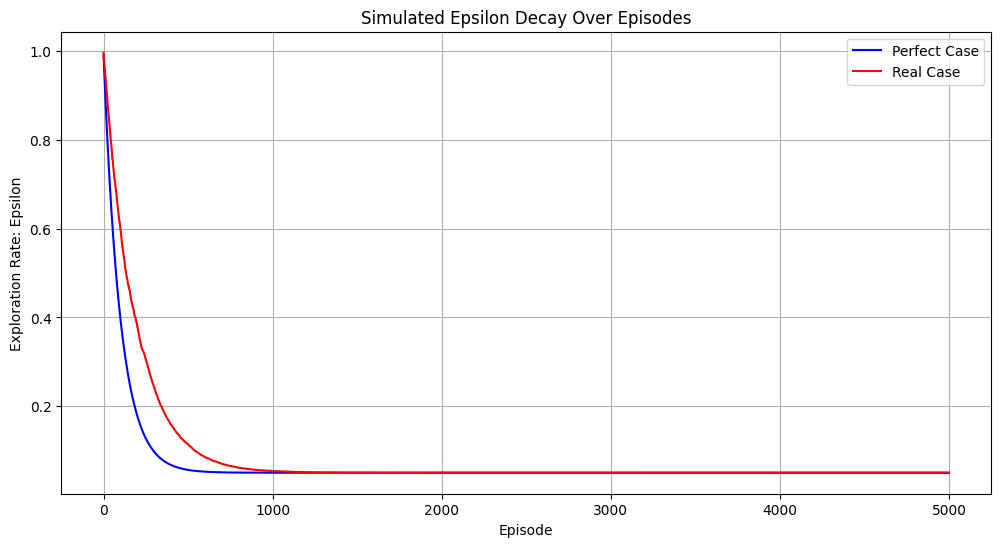

In [38]:
# ==== TEST ====

# ==== Create a test array ====
epsilon_per_episode = []
episodes = 5000
total_episode = range(episodes)
max_steps = 1000

# Perfect Case: the agent survives 1000 steps in each episode
# For each episode, we want to see how epsilon decays
step = 0
for episode in range(episodes):
  for j in range(max_steps):
    decay_epsilon(step, episode)
    step += 1
  # After this episode, we record the epsilon
  epsilon_per_episode.append(epsilon)

# ==== Simulated Real Case ====
# Create a random step array for each episode
# Suppose in episode = 100, the agent only survives 500 steps instead of 1000
# The agent can, pathetically, just survive 100 step in a given episode, say, episode = 543.
random_step_in_episode = np.random.randint(100, max_steps, size=episodes)
random_epsilon_per_episode = []


# Real Case:
step = 0
# Re-initialize epsilon for the second loop simulation
epsilon = epsilon_start # Make sure espilon is reset to the start value
for episode in range(episodes):
  for j in range(random_step_in_episode[episode]):
    decay_epsilon(step, episode)
    step += 1
  # After finish this episode, we record the epsilon
  random_epsilon_per_episode.append(epsilon)

# ==== Restore Epsilon ====
epsilon = epsilon_start


# ==== Plot ====
plt.figure(figsize=(12, 6))
plt.plot(total_episode, epsilon_per_episode, label = 'Perfect Case', color = 'blue')
plt.plot(total_episode, random_epsilon_per_episode, label = 'Real Case', color = 'red')
plt.xlabel('Episode')
plt.ylabel('Exploration Rate: Epsilon')
plt.title('Simulated Epsilon Decay Over Episodes')
plt.grid(True)
plt.legend()
plt.show()

# Double DQN Replay

In [39]:
@tf.function

# ==== Training Step ====
def train_step(states, target_qs, weights):

    with tf.GradientTape() as tape:
        q_pred = model(states, training=True)
        elementwise_loss = tf.keras.losses.Huber(reduction='none')(target_qs, q_pred)
        loss = tf.reduce_mean(elementwise_loss * weights)  # ← IS weighting
    grads = tape.gradient(loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(grads, model.trainable_variables))

# ==== Double Replay ====
def double_replay(batch_size, episode):
  global epsilon, steps

  # === Safe Sample ===
  sampled = memory.sample(batch_size)

  if isinstance(memory, PrioritizedMultiStepReplayBuffer):
      states, actions, rewards, next_states, dones, indices, weights = sampled
  else:
      states, actions, rewards, next_states, dones = sampled
      indices = None
      weights = np.ones_like(rewards)

  # ==== Debug shape ====
  if states.shape != (batch_size, 96, 96, 12):
      print(f"⚠️ [Episode {episode}] Sample shape mismatch: {states.shape}")
      return

  # ==== Check ====
  if states.shape != (batch_size, 96, 96, 12):
    print(f"❌ Shape mismatch: got {states.shape}, skipping training")
    return

  # ==== Double DQN target ====
  next_q_main = model.predict(next_states, verbose=0)
  # Predict next Q-values using main model (for action selection)
  next_actions = np.argmax(next_q_main, axis=1)
  # Predict next Q-values using target model (for evaluation)
  next_q_target = target_model.predict(next_states, verbose=0)

  # ==== Get current Q values ====
  q_values = model.predict(states, verbose=0)

  # ==== TD error ====
  td_errors = []

  for i in range(batch_size):
      target = rewards[i] if dones[i] else rewards[i] + gamma * next_q_target[i][next_actions[i]]
      td_error = abs(target - q_values[i][actions[i]])  # ← TD error
      td_errors.append(td_error)
      q_values[i][actions[i]] = target

  # Train on updated Q-values
  # Call the tf.function-wrapped training step
  # ==== Training Step ====
  train_step(
    tf.convert_to_tensor(states, dtype=tf.float32),
    tf.convert_to_tensor(q_values, dtype=tf.float32),
    tf.convert_to_tensor(weights[:, None], dtype=tf.float32),  # 👈 shape=(batch_size, 1)
  )

  # ==== Update Priorities ====
  if indices is not None:
    memory.update_priorities(indices, td_errors)

# Training Loop Section

### Frame Stack

In [40]:
# ==== Frame Stack ====
# Initialize buffer
NUM_FRAMES = 4
frame_buffer = deque(maxlen=NUM_FRAMES)

def preprocess_frame(frame, size=(96, 96), grayscale=False):
    if grayscale:
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame = cv2.resize(frame, size)
        frame = np.expand_dims(frame, axis=-1)  # (96,96,1)
    else:
        frame = cv2.resize(frame, size)  # RGB
    return frame.astype(np.uint8)

### Shaping reward

In [41]:
def reward_shaping(action, reward, next_state=None, info=None):
  shaped_reward = float(reward)

  # Punish stay
  if action == 0:
    shaped_reward -= 0.1  # Punish not moving
  elif action == 3:  # Gas
      shaped_reward += 0.00
  elif action in [1, 2]:  # Tile
      shaped_reward += 0.00
  elif action == 4:  # Brake
      shaped_reward -= 0.00

  return shaped_reward

# ==== How to Use ====
# In training loop:
# for each episode:
# reward = shaped_reward(action)

## Display

In [42]:
# ==== Display ====
from IPython.display import clear_output
import matplotlib.pyplot as plt
def plot_training_progress(rewards, smoothing=0.9):
    # ==== Smooth ====
    def smooth(data, weight):
        smoothed = []
        last = data[0]
        for point in data:
            smoothed_val = last * weight + (1 - weight) * point
            smoothed.append(smoothed_val)
            last = smoothed_val
        return smoothed

      # ==== Moving Std====
    def moving_std(data, window=20):
        return [np.std(data[max(0, i - window):i + 1]) for i in range(len(data))]


    smoothed_rewards = smooth(rewards, smoothing)

    std_rewards = moving_std(rewards)
    upper = np.array(smoothed_rewards) + np.array(std_rewards)
    lower = np.array(smoothed_rewards) - np.array(std_rewards)

    clear_output(wait=True)
    plt.style.use("dark_background")  # Dark background
    plt.figure(figsize=(12, 6))
    #plt.style.use("dark_background")  # Dark background

    x = np.arange(len(rewards))
    plt.plot(x, rewards, color="#00FFAA", alpha=0.3, label='Raw Reward')  # Original raw reward

    smoothed = np.array(smoothed_rewards)
    x = np.arange(len(smoothed))

    # Separate into two arrays
    positive = np.where(smoothed > 0, smoothed, 0)
    negative = np.where(smoothed <= 0, smoothed, 0)

    # Color
    plt.fill_between(x, positive, color="red", alpha=0.5, label='Positive Reward')
    plt.fill_between(x, negative, color="green", alpha=0.5, label='Negative Reward')

    # ==== Green Line ====
    plt.plot(x, smoothed_rewards, color="#00FFFF", linewidth=2.0, label='Smoothed Reward')

    plt.fill_between(x, smoothed_rewards, color="#00FFFF", alpha=0.1)


    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Training Progress — Reward Curve (Inspired by Crypto)')
    plt.legend()
    plt.grid(alpha=0.3)

    # ==== Mark Max ====
    max_idx = np.argmax(rewards)
    plt.scatter([max_idx], [rewards[max_idx]], color='red', label='📈 ATH', zorder=5)
    plt.text(max_idx, rewards[max_idx]+5, f"Max: {rewards[max_idx]:.2f}", color='red')

    plt.tight_layout()
    plt.show()

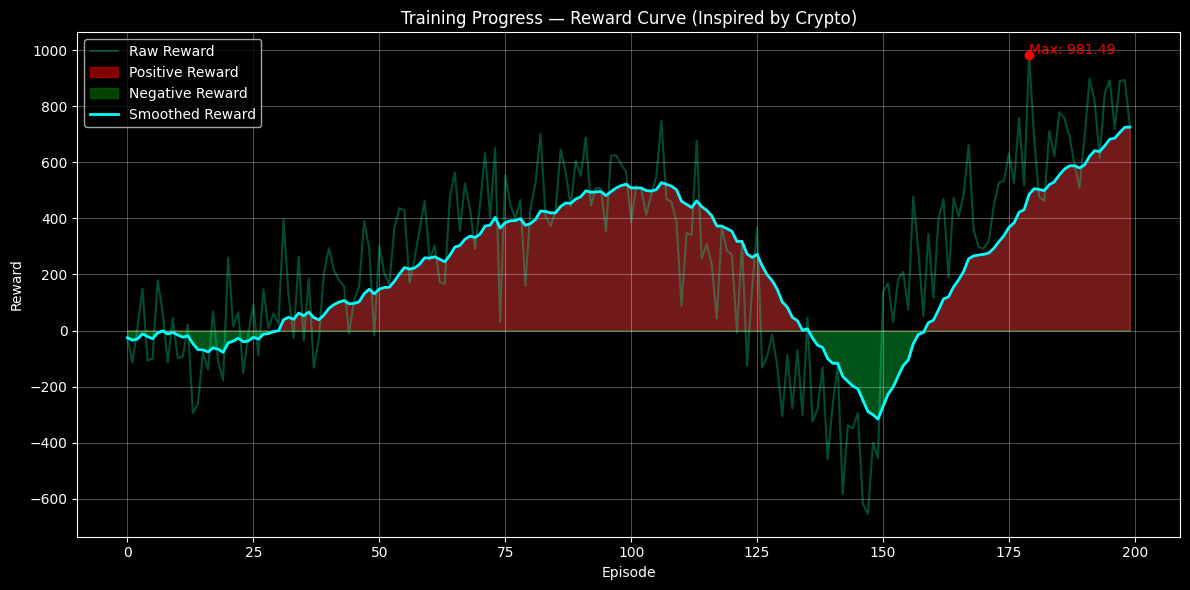

In [43]:
# ==== Test Plot ====
import numpy as np

# ==== Test Reward sequence ====
np.random.seed(42)  # For reproduce
episodes = 200
base_trend = np.concatenate([
    np.linspace(-100, 600, 100),     # Early stage
    np.linspace(600, -500, 50),       # Middle Stage
    np.linspace(100, 900, 50)        # Final Stage
])          # Slowly increase

# ==== High fluctuation ====
fluctuations = np.random.normal(0, 150, size=episodes)
rewards = base_trend + fluctuations

# ==== Call function ====
plot_training_progress(rewards)

## 🚦Training Loop

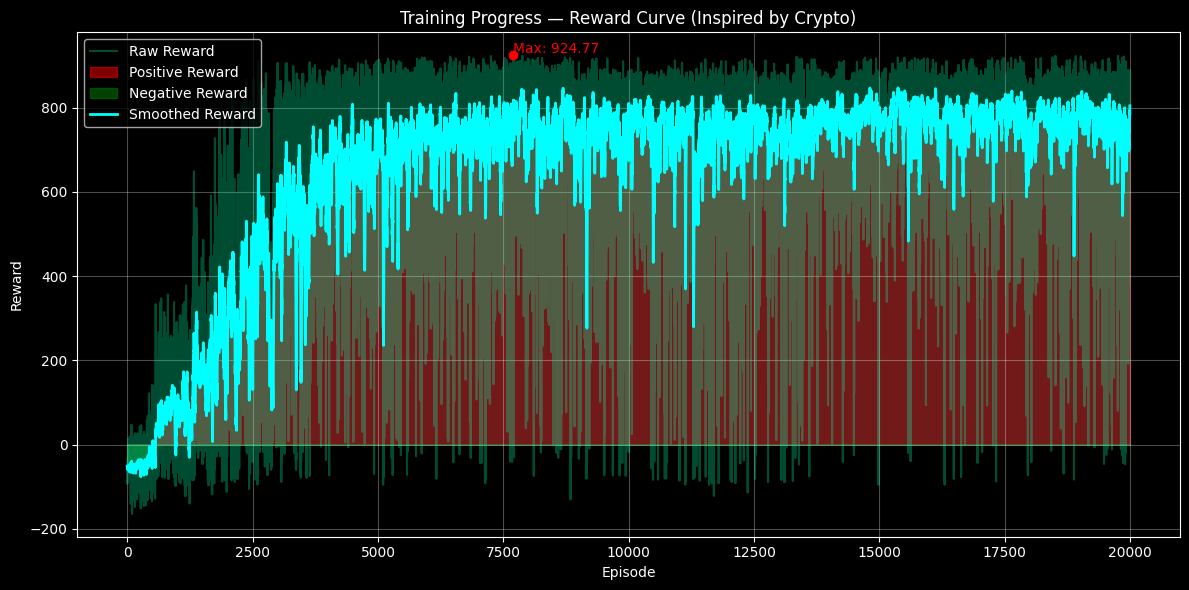

🎬 Episode 20000 | 10:51:57 | Reward: 855.99 | Epsilon: 0.0500 | Domain Randomization =True | Entropy: 1.46 bits
Top actions in this episode: [(3, 149), (2, 56), (1, 24), (4, 5), (0, 4)]
Training complete after 20000 episodes.
Best model score: 924.77


In [44]:

# ==== Test Frame Stack by Me ====
from datetime import datetime

global memory

# ==== Build Target Network ====
model = build_model(input_shape = (96, 96, 12), action_size = 5)
target_model = build_model(input_shape=(96, 96, 12), action_size=5)
target_model.set_weights(model.get_weights())



# ==== Training Parameters ====
episodes = 20000 # More is good
batch_size = 128 # Minibatch size
gamma = 0.95 # Discount rate (~1 future is import)
max_step = 1000 # Max step per eposide
best_score = -np.inf

# ==== Before loop ====
steps = 0  # Initialize the steps

# ==== Record ====
rewards_per_episode = []


# ==== Initial memory type ====
memory = MultiStepReplayBuffer(capacity=100000, n_step=5, gamma=0.99)

# ==== Track whether switched ====
memory_switched = False

# ==== Clear memory to ensure consistent state shapes ====
# This prevents the ValueError if memory contains states from a non-stacked training run.
memory.clear()

# ===================
# ==== Training Loop ====
for episode in range(episodes):

  # ==== Switching Exploration Strategy ====

  use_epsilon = True

  # ==== Initialize Environment ====
  env = gym.make("CarRacing-v3",
               render_mode= None,
               lap_complete_percent=0.95,
               domain_randomize=True,
               continuous=False)

  # ==== Action History ====
  action_history = []

  # ==== Reset Environment ====
  state, _ = env.reset()

  # ==== Switch to prioritized buffer =====
  # Dynamic Switching Memory
  if episode == 500 and not memory_switched:
      new_memory = PrioritizedMultiStepReplayBuffer(capacity=100000, n_step=5, gamma=0.99)

      # Copy old data over (optional)
      for item in memory.buffer:
          new_memory.tree.add(1.0, item)  # set default priority
      memory = new_memory
      memory_switched = True
      print("🧠 Switched to Prioritized Replay Buffer.")

  # ==== No-op  ====
  for _ in range(50):
      state, _, terminated, truncated, _ = env.step(0)
      if terminated or truncated:
          break

  # ==== Initialize stacking: RGB version ====
  # Preprocess after no-op
  # ==== Preprocess  ====
  state = preprocess_frame(state, grayscale=False)
  frame_buffer = deque([state] * 4, maxlen=4)
  # ==== Stack State ====
  stacked_state = np.concatenate(list(frame_buffer), axis=-1)

  # ==== Episode Reward Initialize ====
  episode_reward =0.0

  # ==== Logic ====
  # state → select action → step in env → get next_state, reward → modify → store in memory

  for time in range(max_step):
    steps += 1  # Ensure epsilon dacay
    # Choose action using epsilon-greedy policy
    # act() → strategy
    # Use stacked state

    # ==== Force Forward ====
    # ==== NEW ====
    if episode < 5 and time < 100:
      # mode 1 (I recommend this one)
      action = np.random.choice([1, 2, 3])

      # mode 2
      # action = np.random.choice([1, 2, 3, 4])
    else:
      action = act(stacked_state, use_epsilon)

    action_history.append(action)

    # ===== Take action ====
    total_reward = 0

    # ==== Frame Skipping ====
    for _ in range(4):  # frame skip 次數
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward = total_reward + reward
        if terminated or truncated:
            break

    done = terminated or truncated

    # ==== Handle Next Step ====
    if isinstance(next_state, tuple):
      next_state = next_state[0]

    next_state = preprocess_frame(next_state, grayscale=False)

    # ==== Update Stack ====
    frame_buffer.append(next_state)
    stacked_next_state = np.concatenate(list(frame_buffer), axis=-1)

    # ==== Reward Shaping ====
    reward = reward_shaping(action, total_reward, stacked_next_state, None)

    # ==== Remember ====
    # Store experience in memory
    # remember → memorize (replay buffer)
    # remember(stacked_state, action, reward, stacked_next_state, done)

    # ==== Memorize ====
    memory.store(stacked_state, action, reward, stacked_next_state, done)

    # ==== Update state ====
    stacked_state = stacked_next_state

    # ==== Record reward ====
    episode_reward = episode_reward + float(reward)

    # If episode ends
    if done:
      rewards_per_episode.append(episode_reward)

      # ====  Action Entropy ====
      action_counts = np.array([action_history.count(a) for a in range(action_size)])

      # Prevent log(0)
      action_probs = action_counts / np.sum(action_counts) + 1e-8

      action_entropy = scipy.stats.entropy(action_probs, base=2)

      # ==== Plot =====

      plot_training_progress(rewards_per_episode)

      # ==== Print ====
      print(f"🎬 Episode {episode+1} | {datetime.now().strftime('%H:%M:%S')} | Reward: {episode_reward:.2f} | Epsilon: {epsilon:.4f} | Domain Randomization ={True} | Entropy: {action_entropy:.2f} bits")
      break

  # ==== Decay Epsilon ====
  decay_epsilon(steps, episode)

  # ==== Train the model using replay memory ====

  replay_start = 5000  # Tunable
  if len(memory) > replay_start and len(memory) > batch_size:
    double_replay(batch_size, episode=episode)

  # ==== Reset Target Network ====
  if episode % 10 == 0:
    target_model.set_weights(model.get_weights())

  # ==== Update Best Score ====
  if episode_reward > best_score:
    best_score = episode_reward
    model.save('best_model.keras')
    print(f"✅ New Best Score {best_score}")

  print("Top actions in this episode:", Counter(action_history).most_common())
  print("======================================")

  # ==== Close Env ====
  env.close()


print(f"Training complete after {episodes} episodes.")
print(f"Best model score: {best_score:.2f}")



# Deterministic Evaluation (Randomize = True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/ops/nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Episode: 1/100, Score: 861.94
Episode: 2/100, Score: 732.28
Episode: 3/100, Score: 838.41
Episode: 4/100, Score: 832.14
Episode: 5/100, Score: 807.53
Episode: 6/100, Score: 859.87
Episode: 7/100, Score: 854.70
Episode: 8/100, Score: 341.47
Episode: 9/100, Score: 836.84
Episode: 10/100, Score: 855.48
Episode: 11/100, Score: 820.69
Episode: 12/100, Score: 856.86
Episode: 13/100, Score: 744.52
Episode: 14/100, Score: 798.65
Episode: 15/100, Score: 877.01
Episode: 16/100, Score: 875.09
Episode: 17/100, Score: 772.34
Episode: 18/100, Score: 805.80
Episode: 19/100, Score: 878.18
Episode: 20/100, Score: 623.47
Episode: 21/100, Score: 758.97
Episode: 22/100, Score: 613.07
Episode: 23/100, Score: 828.57
Episode: 24/100, Score: 568.60
Episode: 25/100, Score: 844.25
Episode: 26/100, Score: 864.29
Episode: 27/100, Score: 746.91
Episode: 28/100, Score: 810.03
Episode: 29/100, Score: 786.85
Episode: 30/100, Score: 857.60
Episode: 31/100, Score: 31.58
Episode: 32/100, Score: 796.32
Episode: 33/100, S

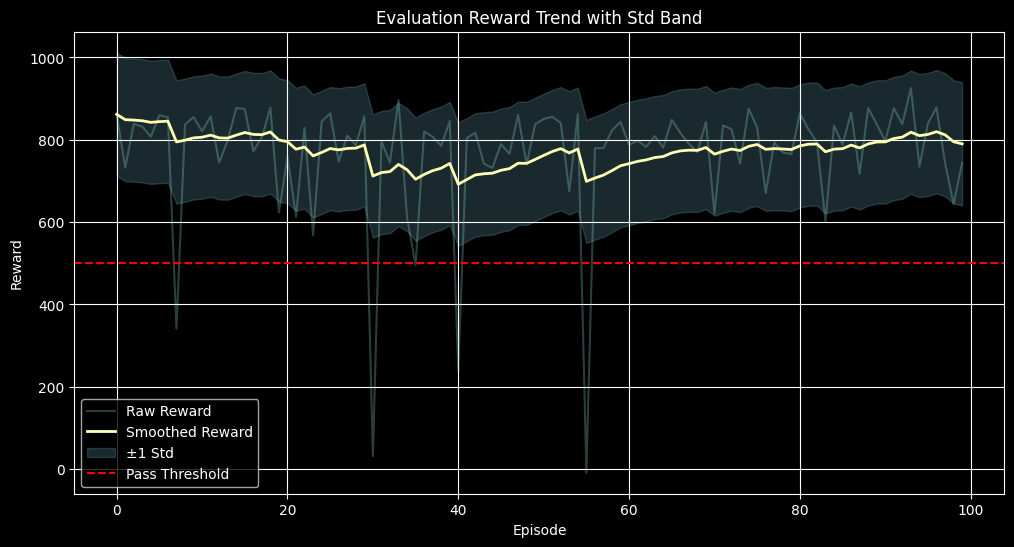

In [45]:
# Re-initialize the environment for evaluation
# Use the same parameters as the training environment

# ==== GIF file ====
output_dir = "10_CNN_test_real_gifs"  # Name your file
os.makedirs(output_dir, exist_ok=True)  # Create it

# ==== Evaluation ====
evaluation_episodes = 100 # Number of evaluation
score = []

# ==== Initialize Environment ====
env = gym.make("CarRacing-v3",
              render_mode= 'rgb_array',
              lap_complete_percent=0.95,
              domain_randomize=True,
              continuous=False)



for episode in range(evaluation_episodes):
  # ==== Make GIF ====
  gif_frames = []

  obs, _ = env.reset()
  frame = preprocess_frame(obs)

  # Initialize frame buffer
  frame_buffer = deque([frame]*NUM_FRAMES, maxlen=NUM_FRAMES)
  stacked_state = np.concatenate(list(frame_buffer), axis=-1)  # shape: (96, 96, 12) if RGB

  total_reward = 0


  for time in range(max_step):
    gif_frames.append(env.render())

    # Step 1: Select action
    q_values = model(stacked_state[np.newaxis, ...], training=False)[0]
    action = np.argmax(q_values)

    # Step 2: Interaction with env.
    next_obs, reward, terminated, truncated, _ = env.step(action)

    # Step 3: Preprocess frame
    next_frame = preprocess_frame(next_obs)

    # Step 4: Update frame buffer + stacked_state
    frame_buffer.append(next_frame)
    stacked_state = np.concatenate(list(frame_buffer), axis=-1)

    # Step 5: Update reward
    total_reward += float(reward)

    # Step 6: Check if done
    done = terminated or truncated
    if done:
        break

  score.append(total_reward)
  print(f"Episode: {episode+1}/{evaluation_episodes}, Score: {total_reward:.2f}")
  gif_path = os.path.join(output_dir, f"episode_{episode+1:03d}-{total_reward:.0f}.gif")
  imageio.mimsave(gif_path, gif_frames, fps=30)

env.close()

# ==== Scores ====
average_score = np.mean(score)
max_score = np.max(score)
min_score = np.min(score)
std_score = np.std(score)

print(f'Evaluation complete after {evaluation_episodes} Episodes')
print(f"Average Score: {average_score:.2f}")
print(f"Max Score: {max_score:.2f}")
print(f"Min Score: {min_score:.2f}")
print(f"Std Score: {std_score:.2f}")

# ==== Visualization ====
def smooth(data, weight=0.9):
    smoothed = []
    last = data[0]
    for point in data:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return np.array(smoothed)

smoothed = smooth(score)
std = np.std(score)


# ==== Use White Background ====
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
# ==== Plot ====
plt.figure(figsize=(12, 6))

x = np.arange(len(score))

plt.plot(x, score, label='Raw Reward', alpha=0.3)

plt.plot(x, smoothed, label='Smoothed Reward', linewidth=2)

# ==== Std Band ====

plt.fill_between(x, smoothed - std, smoothed + std, alpha=0.2, color='skyblue', label='±1 Std')

# ==== Baseline ====
plt.axhline(y=500, color='red', linestyle='--', label='Pass Threshold')

# ==== Title and label ====
plt.title('Evaluation Reward Trend with Std Band')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.grid()
plt.show()



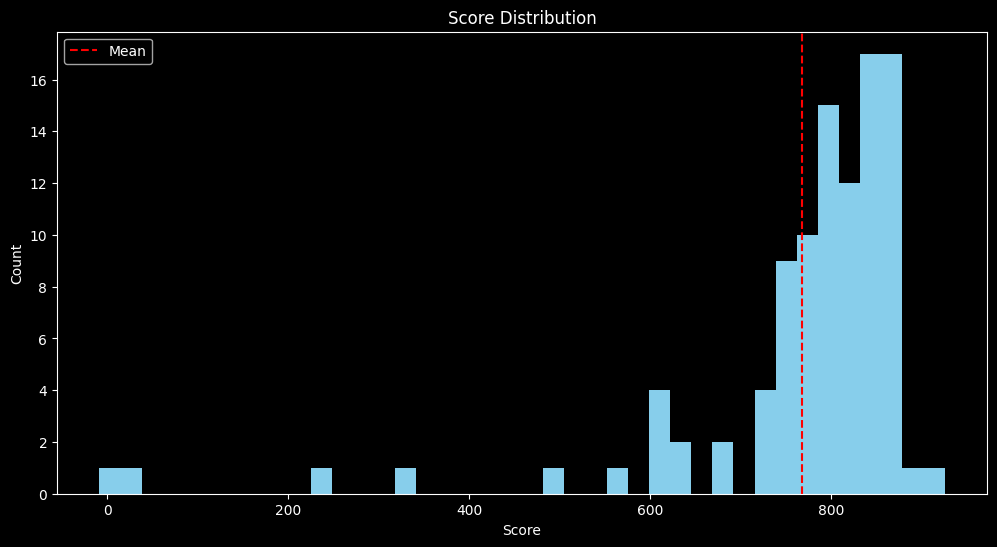

In [46]:
plt.figure(figsize=(12, 6))
plt.hist(score, bins=40, color='skyblue')
score_mean = np.mean(score)
plt.axvline(score_mean, color='red', linestyle='dashed', label='Mean')
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend()
plt.show()

# Uncertainty Evaluation (Domain Randomize = True)

Episode: 1/100, Score: 875.09
Episode: 2/100, Score: 786.67
Episode: 3/100, Score: 844.63
Episode: 4/100, Score: 774.07
Episode: 5/100, Score: 838.31
Episode: 6/100, Score: 825.00
Episode: 7/100, Score: 773.72
Episode: 8/100, Score: 840.00
Episode: 9/100, Score: 868.87
Episode: 10/100, Score: 868.75
Episode: 11/100, Score: 854.55
Episode: 12/100, Score: 780.70
Episode: 13/100, Score: 840.77
Episode: 14/100, Score: 801.96
Episode: 15/100, Score: 840.93
Episode: 16/100, Score: 847.37
Episode: 17/100, Score: 794.56
Episode: 18/100, Score: 758.52
Episode: 19/100, Score: 544.97
Episode: 20/100, Score: 807.64
Episode: 21/100, Score: 846.28
Episode: 22/100, Score: 853.42
Episode: 23/100, Score: 657.10
Episode: 24/100, Score: 714.02
Episode: 25/100, Score: 838.14
Episode: 26/100, Score: 853.24
Episode: 27/100, Score: 842.31
Episode: 28/100, Score: 671.81
Episode: 29/100, Score: 817.24
Episode: 30/100, Score: 639.58
Episode: 31/100, Score: 815.03
Episode: 32/100, Score: 789.33
Episode: 33/100, 

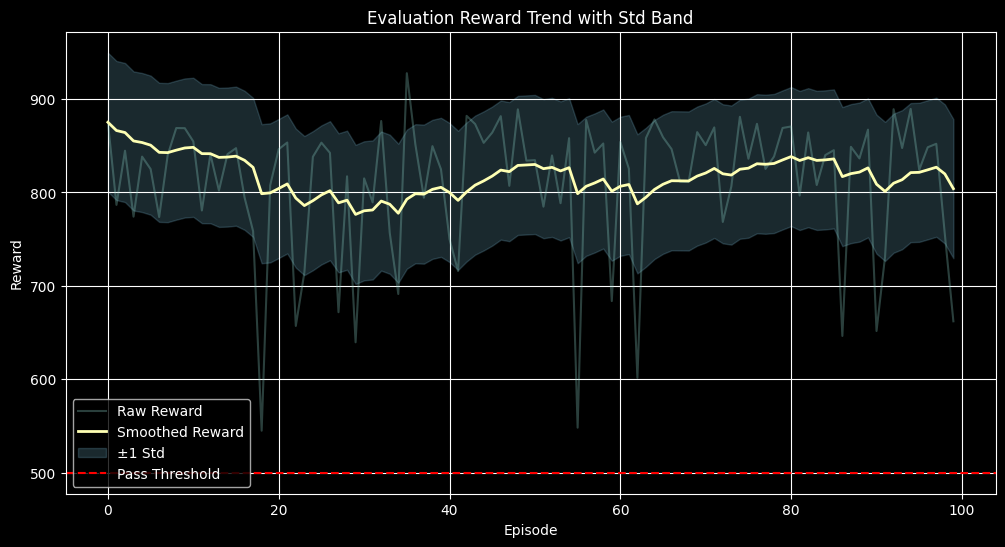

In [47]:
# Re-initialize the environment for evaluation
# Use the same parameters as the training environment

# ==== GIF file ====
output_dir = "10_CNN_test_sandbox_gifs"  # Name your file
os.makedirs(output_dir, exist_ok=True)  # Create it

# ==== Evaluation ====
evaluation_episodes = 100 # Number of evaluation
score = []

# ==== Initialize Environment ====
env = gym.make("CarRacing-v3",
              render_mode= 'rgb_array',
              lap_complete_percent=0.95,
              domain_randomize=True,
              continuous=False)



for episode in range(evaluation_episodes):
  # ==== Make GIF ====
  gif_frames = []

  obs, _ = env.reset()
  frame = preprocess_frame(obs)

  # Initialize frame buffer
  frame_buffer = deque([frame]*NUM_FRAMES, maxlen=NUM_FRAMES)
  stacked_state = np.concatenate(list(frame_buffer), axis=-1)  # shape: (96, 96, 12) if RGB

  total_reward = 0


  for time in range(max_step):
    gif_frames.append(env.render())

    # Step 1: Select action
    q_values = model(stacked_state[np.newaxis, ...], training=True)[0]
    action = np.argmax(q_values)

    # Step 2: Interaction with env.
    next_obs, reward, terminated, truncated, _ = env.step(action)

    # Step 3: Preprocess frame
    next_frame = preprocess_frame(next_obs)

    # Step 4: Update frame buffer + stacked_state
    frame_buffer.append(next_frame)
    stacked_state = np.concatenate(list(frame_buffer), axis=-1)

    # Step 5: Update reward
    total_reward += float(reward)

    # Step 6: Check if done
    done = terminated or truncated
    if done:
        break

  score.append(total_reward)
  print(f"Episode: {episode+1}/{evaluation_episodes}, Score: {total_reward:.2f}")
  gif_path = os.path.join(output_dir, f"episode_{episode+1:03d}-{total_reward:.0f}.gif")
  imageio.mimsave(gif_path, gif_frames, fps=30)

env.close()

# ==== Scores ====
average_score = np.mean(score)
max_score = np.max(score)
min_score = np.min(score)
std_score = np.std(score)

print(f'Evaluation complete after {evaluation_episodes} Episodes')
print(f"Average Score: {average_score:.2f}")
print(f"Max Score: {max_score:.2f}")
print(f"Min Score: {min_score:.2f}")
print(f"Std Score: {std_score:.2f}")

# ==== Visualization ====
def smooth(data, weight=0.9):
    smoothed = []
    last = data[0]
    for point in data:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return np.array(smoothed)

smoothed = smooth(score)
std = np.std(score)


# ==== Use White Background ====
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
# ==== Plot ====
plt.figure(figsize=(12, 6))

x = np.arange(len(score))

plt.plot(x, score, label='Raw Reward', alpha=0.3)

plt.plot(x, smoothed, label='Smoothed Reward', linewidth=2)

# ==== Std Band ====

plt.fill_between(x, smoothed - std, smoothed + std, alpha=0.2, color='skyblue', label='±1 Std')

# ==== Baseline ====
plt.axhline(y=500, color='red', linestyle='--', label='Pass Threshold')

# ==== Title and label ====
plt.title('Evaluation Reward Trend with Std Band')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.grid()
plt.show()



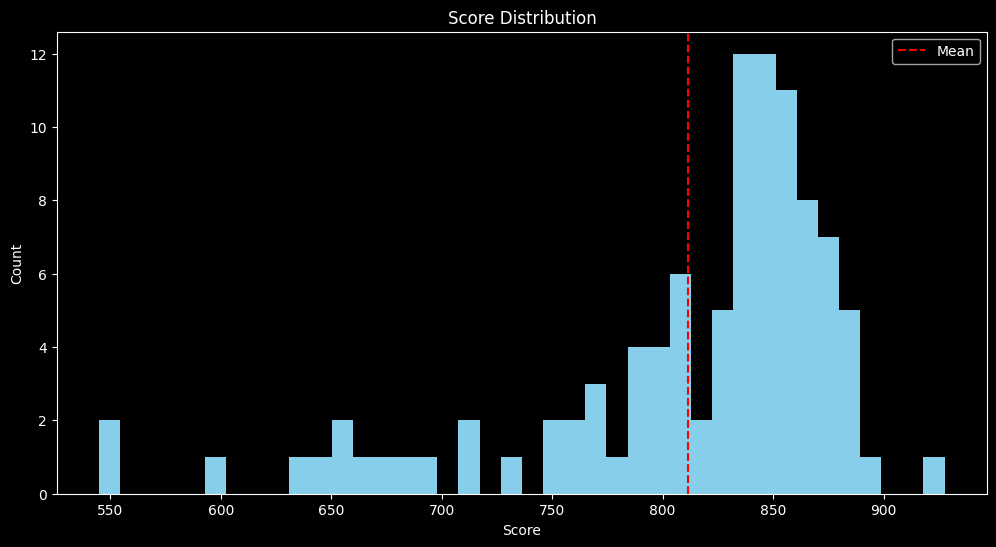

In [54]:
plt.figure(figsize=(12, 6))
plt.hist(score, bins=40, color='skyblue')
score_mean = np.mean(score)
plt.axvline(score_mean, color='red', linestyle='dashed', label='Mean')
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend()
plt.show()

# Save Model Load Model 

Use trained model `best_model` for visualization.





In [50]:
model.save("DQN_model.keras") 
print("Model Saved")

Model Saved


In [53]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf

DQN_model = tf.keras.models.load_model("DQN_model.keras")
DQN_model.summary()
plot_model(DQN_model, to_file="DQN_model.png", show_shapes=True, show_layer_names=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 466 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 96, 96,    │          0 │ -                 │
│ (InputLayer)        │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 96, 96,    │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_123 (Conv2D) │ (None, 96, 96, 8) │        104 │ rescaling_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ contrast_enhance_16 │ (None, 96, 96, 8) │          0 │ conv2d_123[0][0]  │
│ (ContrastEnhance)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sobel_edge_layer_5  │ (None, 96, 96, 8) │          0 │ conv2d_123[0][0]  │
│ (SobelEdgeLayer)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gabor_conv2d_5      │ (None, 96, 96, 8) │      7,744 │ conv2d_123[0][0]  │
│ (GaborConv2D)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ contrast_enhance_17 │ (None, 96, 96, 8) │          0 │ contrast_enhance… │
│ (ContrastEnhance)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_40 (Add)        │ (None, 96, 96, 8) │          0 │ sobel_edge_layer… │
│                     │                   │            │ conv2d_123[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_3          │ (None, 96, 96, 8) │          0 │ gabor_conv2d_5[0… │
│ (Multiply)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_41 (Add)        │ (None, 96, 96, 8) │          0 │ contrast_enhance… │
│                     │                   │            │ add_40[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_42 (Add)        │ (None, 96, 96, 8) │          0 │ multiply_3[0][0], │
│                     │                   │            │ conv2d_123[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_124 (Conv2D) │ (None, 23, 23,    │      8,208 │ conv2d_123[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_132 (Conv2D) │ (None, 23, 23,    │      8,208 │ contrast_enhance… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_140 (Conv2D) │ (None, 23, 23,    │      8,208 │ add_40[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_148 (Conv2D) │ (None, 23, 23,    │      8,208 │ add_41[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_156 (Conv2D) │ (None, 23, 23,    │      8,208 │ add_42[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_120 (ReLU)    │ (None, 23, 23,    │          0 │ conv2d_124[0][0]  │
│                     │ 16)               │            │                 

 Total params: 93,615,393 (357.11 MB)

 Trainable params: 31,202,549 (119.03 MB)

 Non-trainable params: 7,744 (30.25 KB)

 Optimizer params: 62,405,100 (238.06 MB)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/ops/nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Episode: 1/10, Score: 813.58
Episode: 2/10, Score: 935.10
Episode: 3/10, Score: 810.00
Episode: 4/10, Score: 764.29
Episode: 5/10, Score: 929.30
Episode: 6/10, Score: 864.66
Episode: 7/10, Score: 928.30
Episode: 8/10, Score: 802.60
Episode: 9/10, Score: 871.73
Episode: 10/10, Score: 929.00
Evaluation complete after 10 Episodes
Average Score: 864.86
Max Score: 935.10
Min Score: 764.29
Std Score: 60.75


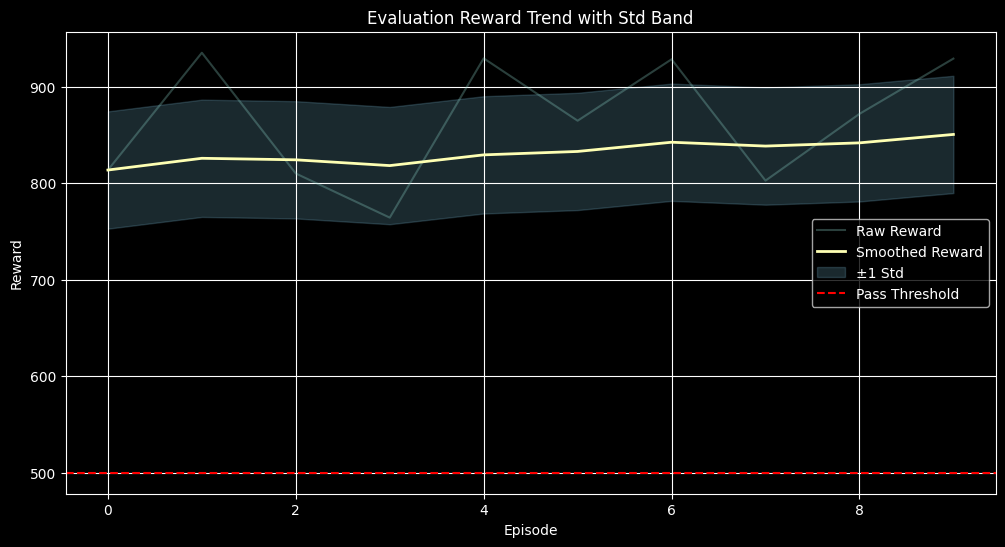

In [55]:
# Re-initialize the environment for evaluation
# Use the same parameters as the training environment

# ==== GIF file ====
output_dir = "10_CNN_test_sandbox_gifs"  # Name your file
os.makedirs(output_dir, exist_ok=True)  # Create it

# ==== Evaluation ====
evaluation_episodes = 10 # Number of evaluation
score = []

# ==== Initialize Environment ====
env = gym.make("CarRacing-v3",
              render_mode= 'rgb_array',
              lap_complete_percent=0.95,
              domain_randomize=True,
              continuous=False)



for episode in range(evaluation_episodes):
  # ==== Make GIF ====
  gif_frames = []

  obs, _ = env.reset()
  frame = preprocess_frame(obs)

  # Initialize frame buffer
  frame_buffer = deque([frame]*NUM_FRAMES, maxlen=NUM_FRAMES)
  stacked_state = np.concatenate(list(frame_buffer), axis=-1)  # shape: (96, 96, 12) if RGB

  total_reward = 0


  for time in range(max_step):
    gif_frames.append(env.render())

    # Step 1: Select action
    q_values = DQN_model(stacked_state[np.newaxis, ...], training=True)[0]
    action = np.argmax(q_values)

    # Step 2: Interaction with env.
    next_obs, reward, terminated, truncated, _ = env.step(action)

    # Step 3: Preprocess frame
    next_frame = preprocess_frame(next_obs)

    # Step 4: Update frame buffer + stacked_state
    frame_buffer.append(next_frame)
    stacked_state = np.concatenate(list(frame_buffer), axis=-1)

    # Step 5: Update reward
    total_reward += float(reward)

    # Step 6: Check if done
    done = terminated or truncated
    if done:
        break

  score.append(total_reward)
  print(f"Episode: {episode+1}/{evaluation_episodes}, Score: {total_reward:.2f}")
  gif_path = os.path.join(output_dir, f"episode_{episode+1:03d}-{total_reward:.0f}.gif")
  imageio.mimsave(gif_path, gif_frames, fps=30)

env.close()

# ==== Scores ====
average_score = np.mean(score)
max_score = np.max(score)
min_score = np.min(score)
std_score = np.std(score)

print(f'Evaluation complete after {evaluation_episodes} Episodes')
print(f"Average Score: {average_score:.2f}")
print(f"Max Score: {max_score:.2f}")
print(f"Min Score: {min_score:.2f}")
print(f"Std Score: {std_score:.2f}")

# ==== Visualization ====
def smooth(data, weight=0.9):
    smoothed = []
    last = data[0]
    for point in data:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return np.array(smoothed)

smoothed = smooth(score)
std = np.std(score)


# ==== Use White Background ====
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
# ==== Plot ====
plt.figure(figsize=(12, 6))

x = np.arange(len(score))

plt.plot(x, score, label='Raw Reward', alpha=0.3)

plt.plot(x, smoothed, label='Smoothed Reward', linewidth=2)

# ==== Std Band ====

plt.fill_between(x, smoothed - std, smoothed + std, alpha=0.2, color='skyblue', label='±1 Std')

# ==== Baseline ====
plt.axhline(y=500, color='red', linestyle='--', label='Pass Threshold')

# ==== Title and label ====
plt.title('Evaluation Reward Trend with Std Band')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.grid()
plt.show()

